In [2]:
suppressPackageStartupMessages({ 
    library(data.table) 
    library(dplyr) 
    library(ggplot2) 
    library(SingleCellExperiment)
    library(dplyr)
    library(celldex)
    library(SingleR)
    library(RColorBrewer)
    library(scater) 
    library(StabMap) 
    library(scran) 
    library(harmony) 
    library(patchwork)
    library(Seurat)
    library(plotly)
    library(pheatmap)
    library(batchelor)
    library(ggpubr)
    library(cowplot)
    library(viridis)
    library(Matrix)
})

## List of Cell Types

In [3]:
#############################
######### MESODERM ##########
#############################

## list mesoderm posterior --> anterior along the primitive streak

Early_gastrula <- c("ExE ectoderm",
                    "Epiblast",
                    "Caudal epiblast",
                    "Primitive Streak",
                    "Nascent mesoderm",
                    "PGC")

yolksac_blood <- c("Haematoendothelial progenitors", 
                   "EMP", 
                   "MEP", 
                   "Megakaryocyte progenitors", 
                   "Blood progenitors", 
                   "Erythroid", 
                   "Chorioallantoic-derived erythroid progenitors")

endo <- c("YS endothelium",
          "Venous endothelium",
          "Embryo proper endothelium",
          "Allantois endothelium")
    
yolksac_other <- c("YS mesothelium-derived endothelial progenitors",
                   "YS mesothelium")

mesenchymal <- c("Embryo proper mesothelium",
                 "Mesenchyme")                   
                
allantois <- c("Allantois endothelium", 
               "Allantois")


In [4]:
#############################
######### MESODERM ##########
#############################

## list mesoderm posterior --> anterior along the primitive streak

Early_gastrula <- c("Primitive Streak",
                    "Nascent mesoderm",
                    "PGC")

yolksac_blood <- c("Haematoendothelial progenitors", 
                   "EMP", 
                   "MEP", 
                   "Megakaryocyte progenitors", 
                   "Blood progenitors", 
                   "Erythroid", 
                   "Chorioallantoic-derived erythroid progenitors")

endo <- c("YS endothelium",
          "Venous endothelium",
          "Embryo proper endothelium",
          "Allantois endothelium")
    
yolksac_other <- c("YS mesothelium-derived endothelial progenitors",
                   "YS mesothelium")

yolksac_other_2 <- c("YS mesothelium-derived endothelial progenitors"
                   #"YS mesothelium"
                     )

mesenchymal <- c("Embryo proper mesothelium",
                 "Mesenchyme")                   
                
allantois <- c("Allantois" 
               #"Allantois endothelium"
              )

ExE_mesoderm <- c(yolksac_blood, endo, yolksac_other, mesenchymal, allantois) 

Cranial_mesoderm <- c("Cranial mesoderm")

Cardiac_mesoderm <- c("Pharyngeal mesoderm",
                  "Cardiopharyngeal progenitors",
                  "Cardiopharyngeal progenitors SHF",
                  "Anterior cardiopharyngeal progenitors",
                  "Cardiopharyngeal progenitors FHF",
                  "Cardiomyocytes FHF 1",
                  "Cardiomyocytes FHF 2",
                  "Cardiomyocytes SHF 1",
                  "Cardiomyocytes SHF 2",
                  "Epicardium",
                  "Endocardium")

Lateral_plate_mesoderm <- c("Lateral plate mesoderm",
                           "Limb mesoderm",
                           "Forelimb")

Intermediate_mesoderm <- c("Intermediate mesoderm", "Kidney primordium")

Paraxial_mesoderm <- c("Paraxial mesoderm", 
                  "Presomitic mesoderm", 
                  "Somitic mesoderm",
                  "Anterior somitic tissues",
                  "Posterior somitic tissues",
                  "Dermomyotome", 
                  "Endotome", 
                  "Sclerotome")

Axial_mesoderm <- c("Caudal mesoderm", 
                  "NMPs", 
                  "NMPs/Mesoderm-biased",
                  "Node",
                  "Notochord")
                       
Frontonasal_mesenchyme <- c("Frontonasal mesenchyme")

mesoderm_list <- c(Early_gastrula,
                   ExE_mesoderm, 
                   Cranial_mesoderm, 
                   Cardiac_mesoderm, 
                   Lateral_plate_mesoderm, 
                   Intermediate_mesoderm, 
                   Paraxial_mesoderm, 
                   Axial_mesoderm,
                   Frontonasal_mesenchyme)

non_ExE_mesoderm_list <- c(Early_gastrula,
                   Cranial_mesoderm, 
                   Cardiac_mesoderm, 
                   Lateral_plate_mesoderm, 
                   Intermediate_mesoderm, 
                   Paraxial_mesoderm, 
                   Axial_mesoderm,
                   Frontonasal_mesenchyme)

cardiac_somitic_mesoderm_list <- c(Cranial_mesoderm, 
                   Cardiac_mesoderm, 
                   Lateral_plate_mesoderm, 
                   Intermediate_mesoderm, 
                   Paraxial_mesoderm, 
                   Axial_mesoderm,
                   Frontonasal_mesenchyme)

hemato_endo <- c(yolksac_blood, 
                   endo, 
                   yolksac_other_2, 
                   allantois)

In [5]:
str(mesoderm_list)

 chr [1:50] "Primitive Streak" "Nascent mesoderm" "PGC" ...


In [6]:
#############################
######### ECTODERM ##########
#############################

Surface_ectoderm <- c("Amniotic ectoderm",
                  "Surface ectoderm",
                  "Epidermis",
                  "Placodal ectoderm",
                  "Otic placode",
                  "Otic neural progenitors",
                  "Limb ectoderm")

# list A --> P + D --> V
Neural_tube <- c("Neural tube",
                "Optic vesicle",
                "Early dorsal forebrain progenitors",
                "Late dorsal forebrain progenitors",
                "Ventral forebrain progenitors",
                "Midbrain progenitors",
                "Dorsal midbrain neurons",
                "Midbrain/Hindbrain boundary",
                "Dorsal hindbrain progenitors", 
                "Hindbrain floor plate",
                "Hindbrain neural progenitors",
                "Ventral hindbrain progenitors",
                "Dorsal spinal cord progenitors",
                "Spinal cord progenitors")

Neural_crest <- c("Migratory neural crest",
                "Branchial arch neural crest")

extra_ectoderm <- c("Ectoderm", "Non-neural ectoderm")

ectoderm_list <- c(Surface_ectoderm, Neural_tube, Neural_crest, extra_ectoderm, "Epiblast", "Caudal epiblast")



In [7]:
#############################
######### ENDODERM ##########
#############################
## list endoderm early --> late, anterior --> posterior 

Primitive_endoderm <- c("Parietal endoderm", 
                     "ExE endoderm",
                     "Visceral endoderm")

Definitive_endoderm <- c("Anterior Primitive Streak",
                 "Gut tube",
                 "Foregut",
                 "Midgut",
                 "Hindgut",
                 "Pharyngeal endoderm",
                 "Thyroid primordium")

endoderm_list <- c(Definitive_endoderm, Primitive_endoderm)

In [8]:
str(ectoderm_list)

 chr [1:27] "Amniotic ectoderm" "Surface ectoderm" "Epidermis" ...


In [9]:
all_germlayer_list <- c(ectoderm_list, mesoderm_list, endoderm_list)

str(all_germlayer_list)

 chr [1:87] "Amniotic ectoderm" "Surface ectoderm" "Epidermis" ...


In [10]:
all_cells <- c("Allantois", "Allantois endothelium", "Amniotic ectoderm", "Anterior cardiopharyngeal progenitors",
               "Anterior Primitive Streak", "Anterior somitic tissues", "Blood progenitors",
               "Branchial arch neural crest", "Cardiomyocytes FHF 1", "Cardiomyocytes FHF 2", "Cardiomyocytes SHF 1",
               "Cardiomyocytes SHF 2", "Cardiopharyngeal progenitors", "Cardiopharyngeal progenitors FHF",
               "Cardiopharyngeal progenitors SHF", "Caudal epiblast", "Caudal mesoderm",
               "Chorioallantoic-derived erythroid progenitors", "Cranial mesoderm", "Dermomyotome",
               "Dorsal hindbrain progenitors", "Dorsal midbrain neurons", "Dorsal spinal cord progenitors",
               "Early dorsal forebrain progenitors", "Ectoderm", "Embryo proper endothelium",
               "Embryo proper mesothelium", "EMP", "Endocardium", "Endotome", "Epiblast", "Epicardium", "Epidermis",
               "Erythroid", "ExE ectoderm", "ExE endoderm", "Foregut", "Forelimb", "Frontonasal mesenchyme",
               "Gut tube", "Haematoendothelial progenitors", "Hindbrain floor plate", "Hindbrain neural progenitors",
               "Hindgut", "Intermediate mesoderm", "Kidney primordium", "Late dorsal forebrain progenitors",
               "Lateral plate mesoderm", "Limb ectoderm", "Limb mesoderm", "Megakaryocyte progenitors", "MEP",
               "Mesenchyme", "Midbrain progenitors", "Midbrain/Hindbrain boundary", "Midgut", "Migratory neural crest",
               "Nascent mesoderm", "Neural tube", "NMPs", "NMPs/Mesoderm-biased", "Node", "Non-neural ectoderm",
               "Notochord", "Optic vesicle", "Otic neural progenitors", "Otic placode", "Paraxial mesoderm",
               "Parietal endoderm", "PGC", "Pharyngeal endoderm", "Pharyngeal mesoderm", "Placodal ectoderm",
               "Posterior somitic tissues", "Presomitic mesoderm", "Primitive Streak", "Sclerotome", "Somitic mesoderm",
               "Spinal cord progenitors", "Surface ectoderm", "Thyroid primordium", "Venous endothelium",
               "Ventral forebrain progenitors", "Ventral hindbrain progenitors", "Visceral endoderm",
               "YS endothelium", "YS mesothelium", "YS mesothelium-derived endothelial progenitors")

In [11]:
str(all_cells)

 chr [1:88] "Allantois" "Allantois endothelium" "Amniotic ectoderm" ...


In [12]:
# Split the character vector into four smaller vectors
split_size <- 22
char_vector_1 <- all_cells[1:split_size]
char_vector_2 <- all_cells[(split_size + 1):(2 * split_size)]
char_vector_3 <- all_cells[(2 * split_size + 1):(3 * split_size)]
char_vector_4 <- all_cells[(3 * split_size + 1):length(all_cells)]

# Print the smaller vectors
print(char_vector_1)
print(char_vector_2)
print(char_vector_3)
print(char_vector_4)

 [1] "Allantois"                                    
 [2] "Allantois endothelium"                        
 [3] "Amniotic ectoderm"                            
 [4] "Anterior cardiopharyngeal progenitors"        
 [5] "Anterior Primitive Streak"                    
 [6] "Anterior somitic tissues"                     
 [7] "Blood progenitors"                            
 [8] "Branchial arch neural crest"                  
 [9] "Cardiomyocytes FHF 1"                         
[10] "Cardiomyocytes FHF 2"                         
[11] "Cardiomyocytes SHF 1"                         
[12] "Cardiomyocytes SHF 2"                         
[13] "Cardiopharyngeal progenitors"                 
[14] "Cardiopharyngeal progenitors FHF"             
[15] "Cardiopharyngeal progenitors SHF"             
[16] "Caudal epiblast"                              
[17] "Caudal mesoderm"                              
[18] "Chorioallantoic-derived erythroid progenitors"
[19] "Cranial mesoderm"                       

In [13]:
not_in_both <- setdiff(unique(c(all_cells, all_germlayer_list)), intersect(all_cells, all_germlayer_list))

# Display the names that do not appear in both lists
print(not_in_both)

[1] "ExE ectoderm"


In [14]:
ordered_cell_types_post_QC <- c(
    # extraembryonic
    
  "proximal ExE ectoderm #1",
  "proximal ExE ectoderm #2",

  "distal ExE ectoderm #1",
  "distal ExE ectoderm #2",
  "ExE ectoderm #3",
    
  "visceral endoderm #1",

  "visceral endoderm #2",
        "ExE endoderm",
    
  # Ectoderm

  "brain #1",
  "brain #2",
  "brain #3",
  "brain #6",
  "brain #5",
  "brain #4",

          "spinal cord",

  "otic placode",
  "surface ectoderm #1",
  "surface ectoderm #2",

  "neural crest #1",
  "neural crest #2",
  "neural crest #3",


    
  # Mesoderm
# Early
      "epiblast",
      "caudal epiblast",
      "rostral epiblast",

    "primitive streak",
  "ExE mesoderm",
  "mesodermal wings",
# LPM
      "lateral plate mesoderm",

  "posterior somatic LP mesoderm #1",
          "posterior somatic LP mesoderm #2",
    
      "mesenchyme",
          "allantois",
    
# blood
       "blood",
  "haematoendothelial",

     "macrophage",
    
# endo
    "endothelium #1",
  "endothelium #2",


  
# heart
  "cardiomyocytes",
  "splanchnic LP mesoderm #1",
  "splanchnic LP mesoderm #2",
    
# paraxial
      "anterior somitic tissue",
  "posterior somitic tissue",
  "paraxial mesoderm",
    "presomitic mesoderm",

    
    


      # Endoderm

  "definitive endoderm",
  "hindgut",
  "midgut",

  "ventral foregut",
  "dorsal foregut"
  
  # Miscellaneous

)

In [15]:
ordered_cell_types_extended <- c(
    # extraembryonic
    
  "ExE ectoderm",
    "Visceral endoderm",
  "ExE endoderm",
  "Parietal endoderm",
    
  # Ectoderm

  
    
      "Ventral hindbrain progenitors",
      "Midbrain/Hindbrain boundary",
      "Hindbrain neural progenitors",
  "Optic vesicle",
  "Ventral forebrain progenitors",
  "Early dorsal forebrain progenitors",
  "Late dorsal forebrain progenitors",

  "Hindbrain floor plate",
    
  "Midbrain progenitors",
  "Dorsal midbrain neurons",

  "Dorsal hindbrain progenitors",


  "Neural tube",
 
  "Frontonasal mesenchyme",
  "Spinal cord progenitors",
  "Dorsal spinal cord progenitors",
  "Non-neural ectoderm",
  "Surface ectoderm",
  "Epidermis",
  "Limb ectoderm",
  "Amniotic ectoderm",
  "Placodal ectoderm",
  "Otic placode",
  "Otic neural progenitors",
    

  "Branchial arch neural crest",
     "Migratory neural crest",
    
  # Mesoderm
    # EARLY
    "Ectoderm",
      "Epiblast",
  "Caudal epiblast",
      "Primitive Streak",

     "Nascent mesoderm",
  "Intermediate mesoderm",
  "Caudal mesoderm",
    
    #LPM
      "Lateral plate mesoderm",

  "Limb mesoderm",
  "Forelimb",
  "Kidney primordium",
      "Mesenchyme",
    
          "Allantois",
    # BLOOD

  "Blood progenitors",
  "Erythroid",
  "Chorioallantoic-derived erythroid progenitors",
  "Megakaryocyte progenitors",
  "MEP",
  "EMP",
     "Haematoendothelial progenitors",
    
    #ENDO

  "YS endothelium",
  "YS mesothelium-derived endothelial progenitors",
  "Allantois endothelium",
  "Embryo proper endothelium",
  "Venous endothelium",
  "Endocardium",


    
    # HEART
      "Cardiopharyngeal progenitors FHF",
  "Cardiomyocytes FHF 1",
  "Cardiomyocytes FHF 2",
  "Cardiopharyngeal progenitors SHF",
  "Cardiomyocytes SHF 1",
  "Cardiomyocytes SHF 2",
     "Pharyngeal mesoderm",
  "Cardiopharyngeal progenitors",
  "Anterior cardiopharyngeal progenitors",
      "Epicardium",
    
    #PARAXIAL
         "Anterior somitic tissues",
      "Presomitic mesoderm",
  "Somitic mesoderm",
 
  "Paraxial mesoderm",
       "Endotome",


  "Sclerotome",
  "Dermomyotome",
         "Posterior somitic tissues",
    
  "PGC",
  "NMPs/Mesoderm-biased",
  "NMPs",
  "Node",
  "Notochord",
 


 
  "Cranial mesoderm",
  "YS mesothelium",
  "Embryo proper mesothelium",

 
    
  # Endoderm
  "Anterior Primitive Streak",

  "Gut tube",
  "Hindgut",
  "Midgut",
  "Foregut",
  "Pharyngeal endoderm",
  "Thyroid primordium"
  

)


## Celltype Colours

In [16]:
embryo_colors <- c(
  "embryo_1" = "#1f78b4",  # shades of blue
  "embryo_2" = "#a6cee3",  # shades of blue
  "embryo_3" = "#33a02c",  # shades of green
  "embryo_4" = "#b2df8a",  # shades of green
  "embryo_5" = "#ff7f00",  # shades of orange
  "embryo_6" = "#fdbf6f",  # shades of orange
  "embryo_7" = "#ffcc00"   # shades of orange
)


In [17]:
stage_ID_colors <- c(
  "embryo_1" = "#1f78b4",  # shades of blue
  "embryo_2" = "#a6cee3",  # shades of blue
  "embryo_3" = "#33a02c",  # shades of green
  "embryo_4" = "#b2df8a",  # shades of green
  "embryo_5" = "#ff7f00",  # shades of orange
  "embryo_6" = "#fdbf6f",  # shades of orange
  "embryo_7" = "#ffcc00",   # shades of orange
    
"E6.5" = "#F21A00",
"E6.75" = "#EC4B00",
"E7.0" = "#E67D00",
"E7.25" = "#E1AF00",
"E7.5" = "#E4B80E",
"E7.75"="#E7C21C",
"E8.0" = "#EBCC2A",
"E8.25" = "#C4C55D",
"E8.5" = "#9EBE91",
"E8.75" = "#78B7C5",
"E9.0" = "#3399FF",
"E9.25"="#297ACC",
"E9.5"="#2162A3",
"Mixed gastrulation" = "#BEBEBE"
)


In [18]:
post_QC_cluster_colors_E6_E7 <- c(
  "failed_qc" = "#CCCCCC",
  "0" = "#7FC97F",   # Green
  "1" = "#BEAED4",   # Purple
  "2" = "#FDC086",   # Orange
  "3" = "#FFFF99",   # Yellow
  "4" = "#386CB0",   # Blue
  "5" = "#F0027F",   # Red
  "6" = "#ADD8E6",   # Light blue (adjusted)
  "7" = "#444444",   # Dark grey (adjusted)
  "8" = "#FFC0CB",   # Pale pink (adjusted)
  "9" = "#D95F02",   # Dark orange
  "10" = "#7570B3",  # Dark purple
  "11" = "#800000",  # Maroon (adjusted)
  "12" = "#66A61E",  # Dark green
  "13" = "#E6AB02",  # Dark yellow
  "14" = "#FF7F00",  # Orange
  "15" = "#6A3D9A"   # Dark purple (adjusted)
)


In [19]:
post_QC_cluster_colors_E8 <- c(
  "failed_qc" = "#CCCCCC",
  "0" = "#7FC97F",    # Green
  "1" = "#BEAED4",    # Purple
  "2" = "#FDC086",    # Orange
  "3" = "#FFFF99",    # Yellow
  "4" = "#386CB0",    # Blue
  "5" = "#F0027F",    # Red
  "6" = "#ADD8E6",    # Light blue
  "7" = "#444444",    # Dark grey
  "8" = "#FFC0CB",    # Pale pink
  "9" = "#D95F02",    # Dark orange
  "10" = "#7570B3",   # Dark purple
  "11" = "#800000",   # Maroon
  "12" = "#66A61E",   # Dark green
  "13" = "#E6AB02",   # Dark yellow
  "14" = "#FF7F00",   # Orange
  "15" = "#6A3D9A",   # Dark purple
  "16" = "#1F78B4",   # Medium blue
  "17" = "#33A02C",   # Green (adjusted)
  "18" = "#FB9A99",   # Light red
  "19" = "#E31A1C",   # Red (adjusted)
  "20" = "#FDBF6F",   # Light orange
  "21" = "#CAB2D6",   # Lavender
  "22" = "#B2DF8A",   # Light green (adjusted)
  "23" = "#B15928",   # Brown
  "24" = "#FBB4AE",   # Light pink
  "25" = "#FFD92F",   # Yellow (adjusted)
  "26" = "#A6CEE3",   # Light blue (adjusted)
  "27" = "#F0E442",   # Yellow (adjusted)
  "28" = "#FFEDA0",   # Light orange (adjusted)
  "29" = "#1B9E77",   # Dark green (adjusted)
  "30" = "#FD8D3C",   # Dark orange (adjusted)
  "31" = "#800080",   # Purple (adjusted)
  "32" = "#000000"    # Black
)

In [20]:
post_QC_celltype_colours <- c(
  "failed_qc" = "#CCCCCC",
  "rostral epiblast" = "#FFA07A",   # Light Salmon
  "ExE mesoderm" = "#8A2BE2",   # Blue Violet 
  "primitive streak" = "#FF6347",   # Tomato
  "distal ExE ectoderm #1" = "#FFD700",   # Gold
  "visceral endoderm #1" = "#00BFFF",   # Deep Sky Blue
  "caudal epiblast" = "#FF4500",   # Orange Red
  "epiblast" = "#87CEEB",   # Sky Blue
  "proximal ExE ectoderm #2" = "#A9A9A9",   # Dark Gray
  "proximal ExE ectoderm #1" = "#FF69B4",   # Hot Pink
  "distal ExE ectoderm #2" = "#FF8C00",   # Dark Orange
  "ExE endoderm" = "#9400D3",  # Dark Violet
  "visceral endoderm #2" = "#800000",  # Maroon
  "haematoendothelial" = "#556B2F",  # Dark Olive Green
  "definitive endoderm" = "#8B4513",  # Saddle Brown
  "ExE ectoderm #3" = "#FF4500",  # Orange Red
  "mesodermal wings" = "#9932CC",   # Dark Orchid
  "endothelium #1" = "#3CB371",    # Medium Sea Green
  "spinal cord" = "#9400D3",    # Dark Violet
  "blood" = "#FF6347",    # Tomato
  "anterior somitic tissue" = "#FFD700",    # Gold
  "lateral plate mesoderm" = "#4169E1",    # Royal Blue
  "brain #1" = "#FF0000",    # Red
  "posterior somitic tissue" = "#87CEEB",    # Sky Blue
  "brain #2" = "#A9A9A9",    # Dark Grey
  "brain #3" = "#FF69B4",    # Hot Pink
  "cardiomyocytes" = "#FF8C00",    # Dark Orange
  "posterior somatic LP mesoderm #2" = "#8A2BE2",   # Blue Violet
  "hindgut" = "#800000",   # Maroon
  "midgut" = "#556B2F",   # Dark Olive Green
  "neural crest #1" = "#8B4513",   # Saddle Brown
  "mesenchyme" = "#FF6347",   # Tomato
  "paraxial mesoderm" = "#9932CC",   # Dark Orchid
  "surface ectoderm #1" = "#4169E1",   # Royal Blue
  "presomitic mesoderm" = "#3CB371",   # Medium Sea Green
  "surface ectoderm #2" = "#FF69B4",   # Hot Pink
  "neural crest #2" = "#FF0000",   # Red
  "brain #6" = "#FFD700",   # Gold
  "posterior somatic LP mesoderm #1" = "#E6E6FA",   # Lavender
  "dorsal foregut" = "#32CD32",   # Lime Green
  "splanchnic LP mesoderm #1" = "#8B4513",   # Saddle Brown
  "splanchnic LP mesoderm #2" = "#FFB6C1",   # Light Pink
  "allantois" = "#FFD700",   # Gold
  "ventral foregut" = "#87CEEB",   # Sky Blue
  "brain #5" = "#FFD700",   # Gold
  "endothelium #2" = "#FFA500",   # Orange
  "neural crest #3" = "#556B2F",   # Dark Olive Green
  "brain #4" = "#FF8C00",   # Dark Orange
  "otic placode" = "#800080",   # Purple
  "macrophage" = "#808080"    # Gray
)


In [224]:
post_QC_celltype_colours <- c(
  "failed_qc" = "#CCCCCC", # Gray
  "rostral epiblast" = "#FFA07A", # Light Salmon
  "ExE mesoderm" = "#8A2BE2", # Blue Violet
  "primitive streak" = "#FF6347", # Tomato
  "distal ExE ectoderm #1" = "#FFD700", # Gold
  "visceral endoderm #1" = "#00BFFF", # Deep Sky Blue
  "caudal epiblast" = "#FF4500", # Orange Red
  "epiblast" = "#87CEEB", # Sky Blue
  "proximal ExE ectoderm #2" = "#A9A9A9", # Dark Gray
  "proximal ExE ectoderm #1" = "#FF69B4", # Hot Pink
  "distal ExE ectoderm #2" = "#FF8C00", # Dark Orange
  "ExE endoderm" = "#9400D3", # Dark Violet
  "visceral endoderm #2" = "#800000", # Maroon
  "haematoendothelial" = "#556B2F", # Dark Olive Green
  "definitive endoderm" = "#8B4513", # Saddle Brown
  "ExE ectoderm #3" = "#1E90FF", # Dodger Blue
  "mesodermal wings" = "#9932CC", # Dark Orchid
  "endothelium #1" = "#3CB371", # Medium Sea Green
  "spinal cord" = "#D2691E", # Chocolate
  "blood" = "#FF1493", # Deep Pink
  "anterior somitic tissue" = "#FFDAB9", # Peach Puff
  "lateral plate mesoderm" = "#4169E1", # Royal Blue
  "brain #1" = "#FF0000", # Red
  "posterior somitic tissue" = "#87CEFA", # Light Sky Blue
  "brain #2" = "#00FA9A", # Medium Spring Green
  "brain #3" = "#7B68EE", # Medium Slate Blue
  "cardiomyocytes" = "#B22222", # Firebrick
  "posterior somatic LP mesoderm #2" = "#8B0000", # Dark Red
  "hindgut" = "#FF4500", # Orange Red
  "midgut" = "#2E8B57", # Sea Green
  "neural crest #1" = "#8B4513", # Saddle Brown
  "mesenchyme" = "#D8BFD8", # Thistle
  "paraxial mesoderm" = "#DDA0DD", # Plum
  "surface ectoderm #1" = "#FFE4B5", # Moccasin
  "presomitic mesoderm" = "#3CB371", # Medium Sea Green
  "surface ectoderm #2" = "#B0E0E6", # Powder Blue
  "neural crest #2" = "#FF69B4", # Hot Pink
  "brain #6" = "#FFD700", # Gold
  "posterior somatic LP mesoderm #1" = "#E6E6FA", # Lavender
  "dorsal foregut" = "#32CD32", # Lime Green
  "splanchnic LP mesoderm #1" = "#8B4513", # Saddle Brown
  "splanchnic LP mesoderm #2" = "#FFB6C1", # Light Pink
  "allantois" = "#D2B48C", # Tan
  "ventral foregut" = "#87CEEB", # Sky Blue
  "brain #5" = "#8A2BE2", # Blue Violet
  "endothelium #2" = "#FFA500", # Orange
  "neural crest #3" = "#006400", # Dark Green
  "brain #4" = "#FF8C00", # Dark Orange
  "otic placode" = "#800080", # Purple
  "macrophage" = "#808080" # Gray
)


In [21]:
post_QC_celltype_colours_updated <- c(
  "failed_qc" = "#CCCCCC",
  "rostral epiblast" = "#FFA07A",   # Light Salmon
  "ExE mesoderm" = "#8A2BE2",   # Blue Violet
  "primitive streak" = "#FF6347",   # Tomato
  "distal ExE ectoderm #1" = "#FFD700",   # Gold
  "visceral endoderm #1" = "#00BFFF",   # Deep Sky Blue
  "caudal epiblast" = "#FF4500",   # Orange Red
  "epiblast" = "#87CEEB",   # Sky Blue
  "proximal ExE ectoderm #2" = "#A9A9A9",   # Dark Gray
  "proximal ExE ectoderm #1" = "#FF69B4",   # Hot Pink
  "distal ExE ectoderm #2" = "#FF8C00",   # Dark Orange
  "ExE endoderm" = "#9400D3",  # Dark Violet
  "visceral endoderm #2" = "#800000",  # Maroon
  "haematoendothelial" = "#556B2F",  # Dark Olive Green
  "definitive endoderm" = "#8B4513",  # Saddle Brown
  "ExE ectoderm #3" = "#FF4500",  # Orange Red
  "mesodermal wings" = "#9932CC",   # Dark Orchid
  "endothelium #1" = "#3CB371",    # Medium Sea Green
  "spinal cord" = "#9400D3",    # Dark Violet
  "blood" = "#FF6347",    # Tomato
  "anterior somitic tissue" = "#FFD700",    # Gold
  "lateral plate mesoderm" = "#4169E1",    # Royal Blue
  "brain #1" = "#FF0000",    # Red
  "posterior somitic tissue" = "#87CEEB",    # Sky Blue
  "brain #2" = "#A9A9A9",    # Dark Grey
  "brain #3" = "#FF69B4",    # Hot Pink
  "cardiomyocytes" = "#FF8C00",    # Dark Orange
  "posterior somatic LP mesoderm #2" = "#8A2BE2",   # Blue Violet
  "hindgut" = "#800000",   # Maroon
  "midgut" = "#556B2F",   # Dark Olive Green
  "neural crest #1" = "#8B4513",   # Saddle Brown
  "mesenchyme" = "#FF6347",   # Tomato
  "paraxial mesoderm" = "#9932CC",   # Dark Orchid
  "surface ectoderm #1" = "#4169E1",   # Royal Blue
  "presomitic mesoderm" = "#3CB371",   # Medium Sea Green
  "surface ectoderm #2" = "#FF69B4",   # Hot Pink
  "neural crest #2" = "#FF0000",   # Red
  "brain #6" = "#FFD700",   # Gold
  "posterior somatic LP mesoderm #1" = "#E6E6FA",   # Lavender
  "dorsal foregut" = "#32CD32",   # Lime Green
  "splanchnic LP mesoderm #1" = "#8B4513",   # Saddle Brown
  "splanchnic LP mesoderm #2" = "#FFB6C1",   # Light Pink
  "allantois" = "#FFD700",   # Gold
  "ventral foregut" = "#87CEEB",   # Sky Blue
  "brain #5" = "#FFD700",   # Gold
  "endothelium #2" = "#FFA500",   # Orange
  "neural crest #3" = "#556B2F",   # Dark Olive Green
  "brain #4" = "#FF8C00",   # Dark Orange
  "otic placode" = "#800080",   # Purple
  "macrophage" = "#808080"    # Gray
)


In [22]:
ordered_cell_types_post_QC <- c(
  # Endoderm
  "primitive streak",
  "visceral endoderm #1",
  "caudal epiblast",
  "definitive endoderm",
  "ExE endoderm",
  "visceral endoderm #2",
  "hindgut",
  "midgut",
  "allantois",
  "ventral foregut",
  
  # Mesoderm
  "ExE mesoderm",
  "haematoendothelial",
  "mesodermal wings",
  "lateral plate mesoderm",
  "mesenchyme",
  "paraxial mesoderm",
  "splanchnic LP mesoderm #1",
  "splanchnic LP mesoderm #2",
  "posterior somatic LP mesoderm #2",
  "spinal cord",
  "blood",
  "cardiomyocytes",
  
  # Ectoderm
  "rostral epiblast",
  "distal ExE ectoderm #1",
  "epiblast",
  "proximal ExE ectoderm #2",
  "proximal ExE ectoderm #1",
  "distal ExE ectoderm #2",
  "ExE ectoderm #3",
  "brain #1",
  "brain #2",
  "brain #3",
  "brain #6",
  "brain #5",
  "brain #4",
  "otic placode",
  "surface ectoderm #1",
  "surface ectoderm #2",
  "endothelium #1",
  "endothelium #2",
  "neural crest #1",
  "neural crest #2",
  "neural crest #3",
  
  # Miscellaneous
  "macrophage"
)


In [23]:
seurat_colors <- c(
 "failed_qc" = "#CCCCCC",
 "0" = "#FACB12",
  "1" = "#DABE99",
  "2" = "#9e6762",
  "3" = "#635547",
  "4" = "#c19f70",
  "5" = "#F397C0",
  "6" = "#ff00b2",
  "7" = "#ffb7ff",
  "8" = "#95e1ff",
  "9" = "#97bad3",
  "10" = "#C594BF",
  "11" = "#139992",
  "12" = "#3F84AA",
  "13" = "#F9DFE6",
  "14" = "#e35f82",
  "15" = "#d02d75",
  "16" = "#e85639",
  "17" = "#5581ca",
  "18" = "#005579",
  "19" = "#5adbe4",
  "20" = "#8DB5CE",
  "21" = "#456722",
  "22" = "#d5e839",
  "23" = "#e3cb3a",
  "24" = "#00BFC4",
  "25" = "#C9EBFB",
  "26" = "#556789",
  "27" = "#683ed8",
  "28" = "#532C8A",
  "29" = "#cc7818",
  "30" = "#ff7f9c",
  "31" = "#f79083",
  "32" = "#ff487d",
  "33" = "#d780b0",
  "34" = "#a64d7e",
  "35" = "#B51D8D",
  "36" = "#4b7193",
  "37" = "#5d70dc",
  "38" = "#332c6c",
  "39" = "#FBBE92",
  "40" = "#6c4b4c",
  "41" = "#4b7193",
  "42" = "#5d70dc",
  "43" = "#332c6c",
  "44" = "#FBBE92",
  "45" = "#6c4b4c",
  "46" = "#C72228",
  "47" = "#E50000",
  "48" = "#e3cb3a",
  "49" = "#EF4E22",
  "50" = "#7c2a47",
  "51" = "#ff891c",
  "52" = "#AE3F3F",
  "53" = "#2f4a60",
  "54" = "#90e3bf",
  "55" = "#bd3400",
  "56" = "#9d0049",
  "57" = "#89c1f5",
  "58" = "#8EC792",
  "59" = "#ff675c",
  "60" = "#bd7300",
  "61" = "#a0b689",
  "62" = "#0f8073",
  "63" = "#7a9941",
  "64" = "#8ab3b5",
  "65" = "#9bf981",
  "66" = "#12ed4c",
  "67" = "#7e907a",
  "68" = "#2c6521",
  "69" = "#bf9da8",
  "70" = "#59b545",
  "71" = "#233629",
  "72" = "#4a6798",
  "73" = "#bd84b0",
  "74" = "#d3b1b1",
  "75" = "#6b2035",
  "76" = "#e273d6",
  "77" = "#f7f79e",
  "78" = "#fcff00",
  "79" = "#fff335",
  "80" = "#ffd731",
  "81" = "#dbb400",
  "82" = "#ff5c00",
  "83" = "#f1a262",
  "84" = "#00b000",
  "85" = "#F6BFCB",
  "86" = "#7F6874",
  "87" = "#989898",
  "88" = "#1A1A1A"
)

In [24]:
stages_colors = c(
"E6.5" = "#F21A00",
"E6.75" = "#EC4B00",
"E7.0" = "#E67D00",
"E7.25" = "#E1AF00",
"E7.5" = "#E4B80E",
"E7.75"="#E7C21C",
"E8.0" = "#EBCC2A",
"E8.25" = "#C4C55D",
"E8.5" = "#9EBE91",
"E8.75" = "#78B7C5",
"E9.0" = "#3399FF",
"E9.25"="#297ACC",
"E9.5"="#2162A3",
"Mixed gastrulation" = "#BEBEBE")

In [25]:
anatomy_colors = c(
"EP" = "#000000",
"YS" = "#5E4FA2",
"Anterior section" = "#774611",
"Posterior section" = "#A2D630",
"Medial section" = "#D95F02",
"Posterior"="#E2C207",
"Anterior" = "#F71616",
"Pooled" = "#BEBEBE",
"NA" = "#BEBEBE")

In [26]:
original.colors = c(
  "Epiblast" = "#635547",
  "Primitive Streak" = "#DABE99",
  "Anterior Primitive Streak" = "#c19f70",
  "Caudal epiblast" = "#9e6762",
  "PGC" = "#FACB12",
  "Anterior Primitive_Streak" = "#c19f70",
  "Notochord" = "#0F4A9C",
  "Def. endoderm" = "#F397C0",
  "Gut" = "#EF5A9D",
  "Nascent mesoderm" = "#C594BF",
  "Mixed mesoderm" = "#DFCDE4",
  "Intermediate mesoderm" = "#139992",
  "Caudal Mesoderm" = "#3F84AA",
  "Paraxial mesoderm" = "#8DB5CE",
  "Somitic mesoderm" = "#005579",
  "Pharyngeal mesoderm" = "#C9EBFB",
  "Cardiomyocytes" = "#B51D8D",
  "Allantois" = "#532C8A",
  "ExE mesoderm" = "#8870ad",
  "Mesenchyme" = "#cc7818",
  "Haematoendothelial progenitors" = "#FBBE92",
  "Endothelium" = "#ff891c",
  "Blood progenitors" = "#c9a997",
  "Blood progenitors 1" = "#f9decf",
  "Blood progenitors 2" = "#c9a997",
  "Erythroid" = "#EF4E22",
  "Erythroid1" = "#C72228",
  "Erythroid2" = "#f79083",
  "Erythroid3" = "#EF4E22",
  "NMP" = "#8EC792",
  "Neurectoderm" = "#65A83E",
  "Rostral neurectoderm" = "#65A83E",
  "Caudal neurectoderm" = "#354E23",
  "Neural crest" = "#C3C388",
  "Forebrain Midbrain_Hindbrain" = "#647a4f",
  "Spinal cord" = "#CDE088",
  "Surface ectoderm" = "#f7f79e",
  "Visceral endoderm" = "#F6BFCB",
  "ExE endoderm" = "#7F6874",
  "ExE ectoderm" = "#989898",
  "Parietal endoderm" = "#1A1A1A"
)

In [27]:
celltype.colors.extended = c(
"Epiblast" = "#635547",
"Primitive Streak" = "#DABE99",
"Caudal epiblast" = "#9e6762",
"PGC" = "#FACB12",
"Anterior Primitive Streak" = "#c19f70",
"Node"="#153b3d",
"Notochord" = "#0F4A9C",
"Gut tube" = "#EF5A9D",
"Hindgut" = "#F397C0",
"Midgut" = "#ff00b2",
"Foregut" = "#ffb7ff",
"Pharyngeal endoderm"="#95e1ff",
"Thyroid primordium"="#97bad3",
"Nascent mesoderm" = "#C594BF",
"Intermediate mesoderm" = "#139992",
"Caudal mesoderm" = "#3F84AA",
"Lateral plate mesoderm" = "#F9DFE6",
"Limb mesoderm" = "#e35f82",
"Forelimb" = "#d02d75",
"Kidney primordium" = "#e85639",
"Presomitic mesoderm"="#5581ca",#"#0000ff",#blue
"Somitic mesoderm" = "#005579",
"Posterior somitic tissues" = "#5adbe4",#"#40e0d0",#turquoise
"Paraxial mesoderm" = "#8DB5CE",
"Cranial mesoderm" = "#456722",#"#006400",#darkgreen
"Anterior somitic tissues"= "#d5e839",
"Sclerotome" = "#e3cb3a",#"#ffff00",#yellow
"Dermomyotome" = "#00BFC4",#"#a52a2a",#brown
"Pharyngeal mesoderm" = "#C9EBFB",
"Cardiopharyngeal progenitors" = "#556789",
"Anterior cardiopharyngeal progenitors"="#683ed8",
"Allantois" = "#532C8A",
"Mesenchyme" = "#cc7818",
"YS mesothelium" = "#ff7f9c",
"Epicardium"="#f79083",
"Embryo proper mesothelium" = "#ff487d",
"Cardiopharyngeal progenitors FHF"="#d780b0",
"Cardiomyocytes FHF 1"="#a64d7e",
"Cardiomyocytes FHF 2"="#B51D8D",
"Cardiopharyngeal progenitors SHF"="#4b7193",
"Cardiomyocytes SHF 1"="#5d70dc",
"Cardiomyocytes SHF 2"="#332c6c",
"Haematoendothelial progenitors" = "#FBBE92",
"Blood progenitors" = "#6c4b4c",
"Erythroid" = "#C72228",
"Chorioallantoic-derived erythroid progenitors"="#E50000",
"Megakaryocyte progenitors"="#e3cb3a",
"MEP"="#EF4E22",
"EMP"="#7c2a47",
"YS endothelium"="#ff891c",
"YS mesothelium-derived endothelial progenitors"="#AE3F3F",
"Allantois endothelium"="#2f4a60",
"Embryo proper endothelium"="#90e3bf",
"Venous endothelium"="#bd3400",
"Endocardium"="#9d0049",
"NMPs/Mesoderm-biased" = "#89c1f5",
"NMPs" = "#8EC792",
"Ectoderm" = "#ff675c",
"Optic vesicle" = "#bd7300",
"Ventral forebrain progenitors"="#a0b689",
"Early dorsal forebrain progenitors"="#0f8073",
"Late dorsal forebrain progenitors"="#7a9941",
"Midbrain/Hindbrain boundary"="#8ab3b5",
"Midbrain progenitors"="#9bf981",
"Dorsal midbrain neurons"="#12ed4c",
"Ventral hindbrain progenitors"="#7e907a",
"Dorsal hindbrain progenitors"="#2c6521",
"Hindbrain floor plate"="#bf9da8",
"Hindbrain neural progenitors"="#59b545",
"Neural tube"="#233629",
"Migratory neural crest"="#4a6798",
"Branchial arch neural crest"="#bd84b0",
"Frontonasal mesenchyme"="#d3b1b1",
"Spinal cord progenitors"="#6b2035",
"Dorsal spinal cord progenitors"="#e273d6",
"Non-neural ectoderm" = "#f7f79e",
"Surface ectoderm" = "#fcff00",
"Epidermis" = "#fff335",
"Limb ectoderm" = "#ffd731",
"Amniotic ectoderm" = "#dbb400",
"Placodal ectoderm" = "#ff5c00",
"Otic placode"="#f1a262",
"Otic neural progenitors"="#00b000",
"Visceral endoderm" = "#F6BFCB",
"ExE endoderm" = "#7F6874",
"ExE ectoderm" = "#989898",
"Parietal endoderm" = "#1A1A1A",
"Endotome" = "#808080",
"unresolved" = "#1A1A1A"
)

In [28]:
ordered_cell_types_extended <- c(
  # Ectoderm
  "Ectoderm",
  "Optic vesicle",
  "Ventral forebrain progenitors",
  "Early dorsal forebrain progenitors",
  "Late dorsal forebrain progenitors",
  "Midbrain/Hindbrain boundary",
  "Midbrain progenitors",
  "Dorsal midbrain neurons",
  "Ventral hindbrain progenitors",
  "Dorsal hindbrain progenitors",
  "Hindbrain floor plate",
  "Hindbrain neural progenitors",
  "Neural tube",
  "Migratory neural crest",
  "Branchial arch neural crest",
  "Frontonasal mesenchyme",
  "Spinal cord progenitors",
  "Dorsal spinal cord progenitors",
  "Non-neural ectoderm",
  "Surface ectoderm",
  "Epidermis",
  "Limb ectoderm",
  "Amniotic ectoderm",
  "Placodal ectoderm",
  "Otic placode",
  "Otic neural progenitors",

  # Endoderm
  "Visceral endoderm",
  "ExE endoderm",
  "Parietal endoderm",
  "Endotome",
  "Primitive Streak",
  "Caudal epiblast",
  "Gut tube",
  "Hindgut",
  "Midgut",
  "Foregut",
  "Pharyngeal endoderm",
  "Thyroid primordium",
  
  # Mesoderm
  "NMPs/Mesoderm-biased",
  "NMPs",
  "Notochord",
  "Nascent mesoderm",
  "Intermediate mesoderm",
  "Caudal mesoderm",
  "Lateral plate mesoderm",
  "Limb mesoderm",
  "Forelimb",
  "Kidney primordium",
  "Presomitic mesoderm",
  "Somitic mesoderm",
  "Posterior somitic tissues",
  "Paraxial mesoderm",
  "Cranial mesoderm",
  "Anterior somitic tissues",
  "Sclerotome",
  "Dermomyotome",
  "Pharyngeal mesoderm",
  "Cardiopharyngeal progenitors",
  "Anterior cardiopharyngeal progenitors",
  "Allantois",
  "Mesenchyme",
  "YS mesothelium",
  "Epicardium",
  "Embryo proper mesothelium",
  "Cardiopharyngeal progenitors FHF",
  "Cardiomyocytes FHF 1",
  "Cardiomyocytes FHF 2",
  "Cardiopharyngeal progenitors SHF",
  "Cardiomyocytes SHF 1",
  "Cardiomyocytes SHF 2",
  "Haematoendothelial progenitors",
  "Blood progenitors",
  "Erythroid",
  "Chorioallantoic-derived erythroid progenitors",
  "Megakaryocyte progenitors",
  "MEP",
  "EMP",
  "YS endothelium",
  "YS mesothelium-derived endothelial progenitors",
  "Allantois endothelium",
  "Embryo proper endothelium",
  "Venous endothelium",
  "Endocardium"
)


In [29]:
celltype.extended <- c(
"failed_qc",
"Epiblast",
"Primitive Streak",
"Caudal epiblast",
"PGC",
"Anterior Primitive Streak",
"Node",
"Notochord",
"Gut tube",
"Hindgut",
"Midgut",
"Foregut",
"Pharyngeal endoderm",
"Thyroid primordium",
"Nascent mesoderm",
"Intermediate mesoderm",
"Caudal mesoderm",
"Lateral plate mesoderm",
"Limb mesoderm",
"Forelimb",
"Kidney primordium",
"Presomitic mesoderm",
"Somitic mesoderm",
"Posterior somitic tissues",
"Paraxial mesoderm",
"Cranial mesoderm",
"Anterior somitic tissues",
"Sclerotome",
"Dermomyotome",
"Pharyngeal mesoderm",
"Cardiopharyngeal progenitors",
"Anterior cardiopharyngeal progenitors",
"Allantois",
"Mesenchyme",
"YS mesothelium",
"Epicardium",
"Embryo proper mesothelium",
"Cardiopharyngeal progenitors FHF",
"Cardiomyocytes FHF 1",
"Cardiomyocytes FHF 2",
"Cardiopharyngeal progenitors SHF",
"Cardiomyocytes SHF 1",
"Cardiomyocytes SHF 2",
"Haematoendothelial progenitors",
"Blood progenitors",
"Erythroid",
"Chorioallantoic-derived erythroid progenitors",
"Megakaryocyte progenitors",
"MEP",
"EMP",
"YS endothelium",
"YS mesothelium-derived endothelial progenitors",
"Allantois endothelium",
"Embryo proper endothelium",
"Venous endothelium",
"Endocardium",
"NMPs/Mesoderm-biased",
"NMPs",
"Ectoderm",
"Optic vesicle",
"Ventral forebrain progenitors",
"Early dorsal forebrain progenitors",
"Late dorsal forebrain progenitors",
"Midbrain/Hindbrain boundary",
"Midbrain progenitors",
"Dorsal midbrain neurons",
"Ventral hindbrain progenitors",
"Dorsal hindbrain progenitors",
"Hindbrain floor plate",
"Hindbrain neural progenitors",
"Neural tube",
"Migratory neural crest",
"Branchial arch neural crest",
"Frontonasal mesenchyme",
"Spinal cord progenitors",
"Dorsal spinal cord progenitors",
"Non-neural ectoderm",
"Surface ectoderm",
"Epidermis",
"Limb ectoderm",
"Amniotic ectoderm",
"Placodal ectoderm",
"Otic placode",
"Otic neural progenitors",
"Visceral endoderm",
"ExE endoderm",
"ExE ectoderm",
"Parietal endoderm",
"Endotome"
)


## Data Locations

In [30]:
##### Load in Seurat Objects for post QC analyses #####

io = list()
io$main = "/rds/project/rds-SDzz0CATGms/users/ltgh2" # this is the main directory

# Set the working directory
setwd(io$main)

io$seqFISH_preQC = file.path(io$main, "projects/03_seqFISH_FINAL/code/seqFISH_integration/processed/seqFISH_within_and_across_dataset_integration_without_neighbour_features_E6_7_8.Rds") 

##### Load in StabMAP_Outputs #####
io$StabMAP_reweighted_MNNcorrected_original_counts_without_neigh_preQC = file.path(io$main, "projects/03_seqFISH_FINAL/code/stab_map_all_together/output/StabMAP_allstages_postQC_reweighted_MNNcorrected_original_counts_without_neigh.Rds")
io$StabMAP_reweighted_MNNcorrected_integrated_counts_without_neigh_preQC = file.path(io$main, "projects/03_seqFISH_FINAL/code/stab_map_all_together/output/StabMAP_allstages_postQC_reweighted_MNNcorrected_integrated_counts_without_neigh.Rds")

## Load in the seqFISH CellType Labels
io$seqFISH_labels_preQC = file.path(io$main, 
                              "projects/03_seqFISH_FINAL/code/stabmap_label_transfer/output/StabMAP_all_stages_reweighted_MNNcorrected_original_counts_without_neigh_LABELS.Rds")

## Load in the seqFISH UMAP coordinates
io$seqFISH_UMAP_preQC = file.path(io$main, 
                               "projects/03_seqFISH_FINAL/code/stab_map_umap_generation/processed/StabMAP_allstage_MNNoriginal_UMAP.rds")

In [31]:
##### Load in Seurat Objects for post QC analyses #####

# Set the working directory
setwd(io$main)

io$atlas = file.path(io$main, "projects/03_seqFISH_FINAL/code/extended_atlas_integration/processed_downsampled/downsample_10K_within_timpoint_all_stages.Rds")
io$seqFISH = file.path(io$main, "projects/03_seqFISH_FINAL/code/seqFISH_integration/processed/seqFISH_after_QC_filtering_within_and_across_dataset_integration_without_neighbour_features_E6_7_8.Rds") 

##### Load in StabMAP_Outputs #####
io$StabMAP_reweighted_MNNcorrected_original_counts_without_neigh = file.path(io$main, "projects/03_seqFISH_FINAL/code/stab_map_all_together_post_QC/output/StabMAP_allstages_postQC_reweighted_MNNcorrected_original_counts_without_neigh.Rds")
io$StabMAP_reweighted_MNNcorrected_integrated_counts_without_neigh = file.path(io$main, "projects/03_seqFISH_FINAL/code/stab_map_all_together_post_QC/output/StabMAP_allstages_postQC_reweighted_MNNcorrected_integrated_counts_without_neigh.Rds")

## Load in the seqFISH CellType Labels
io$seqFISH_labels = file.path(io$main, 
                              "projects/03_seqFISH_FINAL/code/stabmap_label_transfer/output/StabMAP_all_stages_post_QC_reweighted_MNNcorrected_original_counts_without_neigh_LABELS.Rds")

## Load in the seqFISH Imputed Gene Expression
io$seqFISH_imputed_logcounts_e6 = file.path(io$main, 
                              "projects/03_seqFISH_FINAL/code/stabmap_imputation/output/seqFISH_e6_postQC_imputed_RNA.Rds")

io$seqFISH_imputed_logcounts_e7 = file.path(io$main, 
                              "projects/03_seqFISH_FINAL/code/stabmap_imputation/output/seqFISH_e7_postQC_imputed_RNA.Rds")

io$seqFISH_imputed_logcounts_e8_1 = file.path(io$main, 
                              "projects/03_seqFISH_FINAL/code/stabmap_imputation/output/seqFISH_e8_embryo1_postQC_imputed_RNA.Rds")

io$seqFISH_imputed_logcounts_e8_2 = file.path(io$main, 
                              "projects/03_seqFISH_FINAL/code/stabmap_imputation/output/seqFISH_e8_embryo2_postQC_imputed_RNA.Rds")

io$seqFISH_imputed_logcounts_e8_3 = file.path(io$main, 
                              "projects/03_seqFISH_FINAL/code/stabmap_imputation/output/seqFISH_e8_embryo3_postQC_imputed_RNA.Rds")

## Load in the seqFISH Imputed RAW COUNTS Gene Expression
io$seqFISH_imputed_counts_e6 = file.path(io$main, 
                              "projects/03_seqFISH_FINAL/code/stabmap_imputation/output/seqFISH_e6_postQC_imputed_raw_RNA_counts.Rds")

io$seqFISH_imputed_counts_e7 = file.path(io$main, 
                              "projects/03_seqFISH_FINAL/code/stabmap_imputation/output/seqFISH_e7_postQC_imputed_raw_RNA_counts.Rds")

io$seqFISH_imputed_counts_e8_1 = file.path(io$main, 
                              "projects/03_seqFISH_FINAL/code/stabmap_imputation/output/seqFISH_embryo_1_postQC_imputed_raw_RNA_counts.Rds")

io$seqFISH_imputed_counts_e8_2 = file.path(io$main, 
                              "projects/03_seqFISH_FINAL/code/stabmap_imputation/output/seqFISH_embryo_2_postQC_imputed_raw_RNA_counts.Rds")

io$seqFISH_imputed_counts_e8_3 = file.path(io$main, 
                              "projects/03_seqFISH_FINAL/code/stabmap_imputation/output/seqFISH_embryo_3_postQC_imputed_raw_RNA_counts.Rds")


## Load in the seqFISH UMAP coordinates
io$seqFISH_UMAP = file.path(io$main, 
                               "projects/03_seqFISH_FINAL/code/stab_map_umap_generation/processed/StabMAP_allstage_postQC_MNNoriginal_UMAP_seqFISH.rds")

In [32]:
##### Load in StabMAP_Outputs #####
io$StabMAP_reweighted_MNNcorrected_original_counts_without_neigh = file.path(io$main, "projects/03_seqFISH_FINAL/code/stab_map_all_together_post_QC/output/StabMAP_allstages_postQC_reweighted_MNNcorrected_original_counts_without_neigh.Rds")
io$StabMAP_reweighted_MNNcorrected_integrated_counts_without_neigh = file.path(io$main, "projects/03_seqFISH_FINAL/code/stab_map_all_together_post_QC/output/StabMAP_allstages_postQC_reweighted_MNNcorrected_integrated_counts_without_neigh.Rds")

## Load in Seurat Objects and to the Seurat Object add the StabMAP UMAP, Transferred Cell Type Labels and Imputed Gene Expression Matrix

In [33]:
# Load in the seqFISH object_postQC
seqFISH = readRDS(io$seqFISH)

# Load in celltype, stage and anatomy labels
seqFISH_labels = readRDS(io$seqFISH_labels)
seqFISH <- AddMetaData(seqFISH, metadata = seqFISH_labels)

# Load in the StabMAP UMAP coordinates
seqFISH_UMAP = readRDS(io$seqFISH_UMAP)
seqFISH[["StabMAP_UMAP"]] <- seqFISH_UMAP

### this is the log normalized imputed gene expression from the 5 nearest neightbours using impute Embedding, fun = mean ####
# Load in the imputed gene expression 
seqFISH_imputed_logcounts_e6 = readRDS(io$seqFISH_imputed_logcounts_e6)
seqFISH_imputed_logcounts_e7 = readRDS(io$seqFISH_imputed_logcounts_e7)
seqFISH_imputed_logcounts_e8_1 = readRDS(io$seqFISH_imputed_logcounts_e8_1)
seqFISH_imputed_logcounts_e8_2 = readRDS(io$seqFISH_imputed_logcounts_e8_2)
seqFISH_imputed_logcounts_e8_3 = readRDS(io$seqFISH_imputed_logcounts_e8_3)

# Create a combined matrix of gene expression across all time points
imputed_expression <- cbind(seqFISH_imputed_logcounts_e6$scRNA.RNA, 
                            seqFISH_imputed_logcounts_e7$scRNA.RNA, 
                            seqFISH_imputed_logcounts_e8_1$scRNA.RNA, 
                            seqFISH_imputed_logcounts_e8_2$scRNA.RNA, 
                            seqFISH_imputed_logcounts_e8_3$scRNA.RNA)

# Creat a new assay object to store imputed data
imp <- CreateAssayObject(data = imputed_expression)

# add this assay to the previously created Seurat object
seqFISH[["imputed"]] <- imp

### this is the log normalized imputed gene expression from the 5 nearest neightbours using impute Embedding, fun = mean ####
# Load in the imputed gene expression 
seqFISH_imputed_counts_e6 = readRDS(io$seqFISH_imputed_counts_e6)
seqFISH_imputed_counts_e7 = readRDS(io$seqFISH_imputed_counts_e7)
seqFISH_imputed_counts_e8_1 = readRDS(io$seqFISH_imputed_counts_e8_1)
seqFISH_imputed_counts_e8_2 = readRDS(io$seqFISH_imputed_counts_e8_2)
seqFISH_imputed_counts_e8_3 = readRDS(io$seqFISH_imputed_counts_e8_3)

# Create a combined matrix of gene expression across all time points
imputed_counts_expression <- cbind(seqFISH_imputed_counts_e6$scRNA.RNA, 
                            seqFISH_imputed_counts_e7$scRNA.RNA, 
                            seqFISH_imputed_counts_e8_1$scRNA.RNA, 
                            seqFISH_imputed_counts_e8_2$scRNA.RNA, 
                            seqFISH_imputed_counts_e8_3$scRNA.RNA)

# Creat a new assay object to store imputed data
impcounts <- CreateAssayObject(counts = imputed_counts_expression)

# add this assay to the previously created Seurat object
seqFISH[["imputedcounts"]] <- impcounts

seqFISH_postQC <- seqFISH

seqFISH_postQC

Warning message:
“Cannot add objects with duplicate keys (offending key: UMAP_), setting key to 'stabmap_umap_'”


An object of class Seurat 
56393 features across 63188 samples within 5 assays 
Active assay: across_timepoint_integration (351 features, 351 variable features)
 4 other assays present: originalexp, within_timepoint_integration, imputed, imputedcounts
 6 dimensional reductions calculated: pca, umap, spatial, Shila_PCA, Shila_UMAP, StabMAP_UMAP

In [34]:
## Load in the seqFISH UMAP coordinates
io$UMAP_coordinates = file.path(io$main, 
                               "projects/03_seqFISH_FINAL/code/stab_map_umap_generation/processed/StabMAP_allstage_postQC_MNNoriginal_UMAP.rds")

In [35]:
# Load in the seqFISH object_postQC
atlas = readRDS(io$atlas)

In [36]:
seqFISH_preQC = readRDS(io$seqFISH_preQC)

In [37]:
seqFISH_preQC

An object of class Seurat 
1053 features across 73470 samples within 3 assays 
Active assay: across_timepoint_integration (351 features, 351 variable features)
 2 other assays present: originalexp, within_timepoint_integration
 5 dimensional reductions calculated: pca, umap, spatial, Shila_PCA, Shila_UMAP

In [38]:
str(seqFISH_preQC@assays$originalexp)

Formal class 'Assay' [package "SeuratObject"] with 8 slots
  ..@ counts       :Formal class 'dgCMatrix' [package "Matrix"] with 6 slots
  .. .. ..@ i       : int [1:6290902] 13 14 21 25 29 35 36 43 46 48 ...
  .. .. ..@ p       : int [1:73471] 0 93 130 189 212 222 270 350 356 371 ...
  .. .. ..@ Dim     : int [1:2] 351 73470
  .. .. ..@ Dimnames:List of 2
  .. .. .. ..$ : chr [1:351] "Abcc4" "Acp5" "Acvr1" "Acvr2a" ...
  .. .. .. ..$ : chr [1:73470] "embryo6_Pos0_cell2" "embryo6_Pos0_cell3" "embryo6_Pos0_cell4" "embryo6_Pos0_cell5" ...
  .. .. ..@ x       : num [1:6290902] 3 2 1 1 1 1 1 3 1 1 ...
  .. .. ..@ factors : list()
  ..@ data         : num [1:351, 1:73470] 0 0 0 0 0 0 0 0 0 0 ...
  .. ..- attr(*, "dimnames")=List of 2
  .. .. ..$ : chr [1:351] "Abcc4" "Acp5" "Acvr1" "Acvr2a" ...
  .. .. ..$ : chr [1:73470] "embryo6_Pos0_cell2" "embryo6_Pos0_cell3" "embryo6_Pos0_cell4" "embryo6_Pos0_cell5" ...
  ..@ scale.data   : num[0 , 0 ] 
  ..@ key          : Named chr "originalexp_"
  ..

In [39]:
seqFISH_counts <- seqFISH_preQC@assays$originalexp@counts
seqFISH_logcounts <- seqFISH_preQC@assays$originalexp@data

In [40]:
seqFISH_probes <- rownames(seqFISH_counts)

In [41]:
atlas_counts <- atlas@assays$originalexp@counts
atlas_logcounts <- atlas@assays$originalexp@data

In [42]:
seqFISH_imputed_logcounts <- imputed_expression

In [43]:
seqFISH_imputed_counts <- imputed_counts_expression

In [44]:
dim(seqFISH_imputed_counts)

[1] 27670 63188

In [45]:
dim(atlas_logcounts)

[1]  27669 125559

## Generating a new combined log counts matrix that includes the original counts from the scRNA data and the imputed counts or log counts for the seqFISH dataset

In [46]:
seqFISH_preQC

An object of class Seurat 
1053 features across 73470 samples within 3 assays 
Active assay: across_timepoint_integration (351 features, 351 variable features)
 2 other assays present: originalexp, within_timepoint_integration
 5 dimensional reductions calculated: pca, umap, spatial, Shila_PCA, Shila_UMAP

In [47]:
seqFISH_cells_pre_QC <- colnames(seqFISH_preQC)
seqFISH_cells_post_QC <- colnames(seqFISH_postQC)

In [48]:
# Step 1: Cells in pre-QC but not in post-QC
cells_pre_not_in_post <- setdiff(seqFISH_cells_pre_QC, seqFISH_cells_post_QC)

In [49]:
str(cells_pre_not_in_post)

 chr [1:10282] "embryo6_Pos0_cell5" "embryo6_Pos0_cell6" ...


In [50]:
counts_matrix1 <- atlas_logcounts
counts_matrix2 <- seqFISH_imputed_logcounts

# Step 1: Find common row names
common_genes <- intersect(rownames(counts_matrix1), rownames(counts_matrix2))
num_common_genes <- length(common_genes)

# Print the number of common genes
cat("Number of common genes:", num_common_genes, "\n")

# Step 2: Subset and align rows
counts_matrix1_aligned <- counts_matrix1[common_genes, ]
counts_matrix2_aligned <- counts_matrix2[common_genes, ]

# Step 3: Combine the matrices by columns
combined_matrix <- cbind(counts_matrix1_aligned, counts_matrix2_aligned)

# Display the combined matrix
head(combined_matrix)

Number of common genes: 27669 


   [[ suppressing 34 column names ‘cell_1’, ‘cell_2’, ‘cell_5’ ... ]]



6 x 188747 sparse Matrix of class "dgCMatrix"
                                                                              
Xkr4    . . . . . . . . .        . . . . . . . . . . . .       . . . . . . . .
Gm1992  . . . . . . . . .        . . . . . . . . . . . .       . . . . . . . .
Gm37381 . . . . . . . . .        . . . . . . . . . . . .       . . . . . . . .
Rp1     . . . . . . . . .        . . . . . . . . . . . .       . . . . . . . .
Sox17   . . . . . . . . 3.065554 . . . . . . . . . . . 2.91074 . . . . . . . .
Gm37323 . . . . . . . . .        . . . . . . . . . . . .       . . . . . . . .
                        
Xkr4    . . . . . ......
Gm1992  . . . . . ......
Gm37381 . . . . . ......
Rp1     . . . . . ......
Sox17   . . . . . ......
Gm37323 . . . . . ......

 .....suppressing 188713 columns in show(); maybe adjust 'options(max.print= *, width = *)'
 ..............................

In [51]:
# Create a zero matrix for cells_pre_not_in_post
zero_matrix <- Matrix(0, nrow = nrow(combined_matrix), ncol = length(cells_pre_not_in_post))
colnames(zero_matrix) <- cells_pre_not_in_post
rownames(zero_matrix) <- rownames(combined_matrix)

# Add the zero columns to the combined matrix
final_combined_matrix <- cbind(combined_matrix, zero_matrix)

# Print the final combined matrix
head(final_combined_matrix)

   [[ suppressing 34 column names ‘cell_1’, ‘cell_2’, ‘cell_5’ ... ]]



6 x 199029 sparse Matrix of class "dgCMatrix"
                                                                              
Xkr4    . . . . . . . . .        . . . . . . . . . . . .       . . . . . . . .
Gm1992  . . . . . . . . .        . . . . . . . . . . . .       . . . . . . . .
Gm37381 . . . . . . . . .        . . . . . . . . . . . .       . . . . . . . .
Rp1     . . . . . . . . .        . . . . . . . . . . . .       . . . . . . . .
Sox17   . . . . . . . . 3.065554 . . . . . . . . . . . 2.91074 . . . . . . . .
Gm37323 . . . . . . . . .        . . . . . . . . . . . .       . . . . . . . .
                        
Xkr4    . . . . . ......
Gm1992  . . . . . ......
Gm37381 . . . . . ......
Rp1     . . . . . ......
Sox17   . . . . . ......
Gm37323 . . . . . ......

 .....suppressing 198995 columns in show(); maybe adjust 'options(max.print= *, width = *)'
 ..............................

In [52]:
dim(final_combined_matrix)

[1]  27669 199029

In [53]:
total_imputed_logcounts <- final_combined_matrix

In [54]:
counts_matrix1 <- atlas_counts
counts_matrix2 <- seqFISH_imputed_counts

# Step 1: Find common row names
common_genes <- intersect(rownames(counts_matrix1), rownames(counts_matrix2))
num_common_genes <- length(common_genes)

# Print the number of common genes
cat("Number of common genes:", num_common_genes, "\n")

# Step 2: Subset and align rows
counts_matrix1_aligned <- counts_matrix1[common_genes, ]
counts_matrix2_aligned <- counts_matrix2[common_genes, ]

# Step 3: Combine the matrices by columns
combined_matrix <- cbind(counts_matrix1_aligned, counts_matrix2_aligned)

# Display the combined matrix
head(combined_matrix)

Number of common genes: 27669 


   [[ suppressing 34 column names ‘cell_1’, ‘cell_2’, ‘cell_5’ ... ]]



6 x 188747 sparse Matrix of class "dgCMatrix"
                                                                           
Xkr4    . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
Gm1992  . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
Gm37381 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
Rp1     . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
Sox17   . . . . . . . . 8 . . . . . . . . . . . 2 . . . . . . . . . . . . .
Gm37323 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
              
Xkr4    ......
Gm1992  ......
Gm37381 ......
Rp1     ......
Sox17   ......
Gm37323 ......

 .....suppressing 188713 columns in show(); maybe adjust 'options(max.print= *, width = *)'
 ..............................

In [55]:
# Create a zero matrix for cells_pre_not_in_post
zero_matrix <- Matrix(0, nrow = nrow(combined_matrix), ncol = length(cells_pre_not_in_post))
colnames(zero_matrix) <- cells_pre_not_in_post
rownames(zero_matrix) <- rownames(combined_matrix)

# Add the zero columns to the combined matrix
final_combined_matrix <- cbind(combined_matrix, zero_matrix)

# Print the final combined matrix
head(final_combined_matrix)

   [[ suppressing 34 column names ‘cell_1’, ‘cell_2’, ‘cell_5’ ... ]]



6 x 199029 sparse Matrix of class "dgCMatrix"
                                                                           
Xkr4    . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
Gm1992  . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
Gm37381 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
Rp1     . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
Sox17   . . . . . . . . 8 . . . . . . . . . . . 2 . . . . . . . . . . . . .
Gm37323 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
              
Xkr4    ......
Gm1992  ......
Gm37381 ......
Rp1     ......
Sox17   ......
Gm37323 ......

 .....suppressing 198995 columns in show(); maybe adjust 'options(max.print= *, width = *)'
 ..............................

In [56]:
dim(final_combined_matrix)

[1]  27669 199029

In [57]:
total_imputed_counts <- final_combined_matrix

In [58]:
dim(total_imputed_counts)

[1]  27669 199029

In [59]:
dim(total_imputed_logcounts)

[1]  27669 199029

In [60]:
head(total_imputed_counts)

   [[ suppressing 34 column names ‘cell_1’, ‘cell_2’, ‘cell_5’ ... ]]



6 x 199029 sparse Matrix of class "dgCMatrix"
                                                                           
Xkr4    . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
Gm1992  . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
Gm37381 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
Rp1     . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
Sox17   . . . . . . . . 8 . . . . . . . . . . . 2 . . . . . . . . . . . . .
Gm37323 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
              
Xkr4    ......
Gm1992  ......
Gm37381 ......
Rp1     ......
Sox17   ......
Gm37323 ......

 .....suppressing 198995 columns in show(); maybe adjust 'options(max.print= *, width = *)'
 ..............................

In [61]:
head(total_imputed_logcounts)

   [[ suppressing 34 column names ‘cell_1’, ‘cell_2’, ‘cell_5’ ... ]]



6 x 199029 sparse Matrix of class "dgCMatrix"
                                                                              
Xkr4    . . . . . . . . .        . . . . . . . . . . . .       . . . . . . . .
Gm1992  . . . . . . . . .        . . . . . . . . . . . .       . . . . . . . .
Gm37381 . . . . . . . . .        . . . . . . . . . . . .       . . . . . . . .
Rp1     . . . . . . . . .        . . . . . . . . . . . .       . . . . . . . .
Sox17   . . . . . . . . 3.065554 . . . . . . . . . . . 2.91074 . . . . . . . .
Gm37323 . . . . . . . . .        . . . . . . . . . . . .       . . . . . . . .
                        
Xkr4    . . . . . ......
Gm1992  . . . . . ......
Gm37381 . . . . . ......
Rp1     . . . . . ......
Sox17   . . . . . ......
Gm37323 . . . . . ......

 .....suppressing 198995 columns in show(); maybe adjust 'options(max.print= *, width = *)'
 ..............................

In [62]:
seurat <- CreateSeuratObject(counts = total_imputed_counts)

In [63]:
seurat

An object of class Seurat 
27669 features across 199029 samples within 1 assay 
Active assay: RNA (27669 features, 0 variable features)

In [64]:
# Creat a new assay object to store imputed data
imputed_logcounts <- CreateAssayObject(data = total_imputed_logcounts)



In [65]:
dim(imputed_logcounts)

[1]  27669 199029

In [66]:
# add this assay to the previously created Seurat object
seurat[["imputedlogcounts"]] <- imputed_logcounts

In [67]:
seurat

An object of class Seurat 
55338 features across 199029 samples within 2 assays 
Active assay: RNA (27669 features, 0 variable features)
 1 other assay present: imputedlogcounts

## Generate an assay with just the seqFISH probe expression for seqFISH and the same set of genes in scRNA dataset

In [68]:
counts_matrix1 <- atlas_logcounts
counts_matrix2 <- seqFISH_logcounts

# Step 1: Find common row names
common_genes <- intersect(rownames(counts_matrix1), rownames(counts_matrix2))
num_common_genes <- length(common_genes)

# Print the number of common genes
cat("Number of common genes:", num_common_genes, "\n")

# Step 2: Subset and align rows
counts_matrix1_aligned <- counts_matrix1[common_genes, ]
counts_matrix2_aligned <- counts_matrix2[common_genes, ]

# Step 3: Combine the matrices by columns
combined_matrix <- cbind(counts_matrix1_aligned, counts_matrix2_aligned)

# Display the combined matrix
head(combined_matrix)

Number of common genes: 350 


   [[ suppressing 34 column names ‘cell_1’, ‘cell_2’, ‘cell_5’ ... ]]



6 x 199029 sparse Matrix of class "dgCMatrix"
                                                                              
Sox17  . . . . . . . . 3.065554 . . . . . . . . . . . 2.91074 . . .        . .
Tfap2b . . . . . . . . .        . . . . . . . . . . . .       . . .        . .
Gbx2   . . . . . . . . .        . . . . . . . . . . . .       . . .        . .
Per2   . . . . . . . . .        . . . . . . . . . . . .       . . .        . .
Twist2 . . . . . . . . .        . . . . . . . . . . . .       . . .        . .
Bcl2   . . . . . . . . .        . . . . . . . . . . . .       . . 1.144674 . .
                             
Sox17  . . . . . . . . ......
Tfap2b . . . . . . . . ......
Gbx2   . . . . . . . . ......
Per2   . . . . . . . . ......
Twist2 . . . . . . . . ......
Bcl2   . . . . . . . . ......

 .....suppressing 198995 columns in show(); maybe adjust 'options(max.print= *, width = *)'
 ..............................

In [69]:
dim(combined_matrix)

[1]    350 199029

In [70]:
total_seqFISH_features_logcounts <- combined_matrix

In [71]:
# Creat a new assay object to store imputed data
seqFISH_logcounts <- CreateAssayObject(data = total_seqFISH_features_logcounts)

# add this assay to the previously created Seurat object
seurat[["seqFISHlogcounts"]] <- seqFISH_logcounts

In [72]:
seurat

An object of class Seurat 
55688 features across 199029 samples within 3 assays 
Active assay: RNA (27669 features, 0 variable features)
 2 other assays present: imputedlogcounts, seqFISHlogcounts

## Data Locations

In [73]:
##### Load in Seurat Objects for post QC analyses #####

io = list()
io$main = "/rds/project/rds-SDzz0CATGms/users/ltgh2" # this is the main directory

# Set the working directory
setwd(io$main)

## Set location for the cell type metadata
io$seqFISH_celltype = file.path(io$main, 
                               "projects/03_seqFISH_FINAL/code/FINAL_METADATA/outputs/seqFISH_celltype.Rds")
io$extended_atlas_celltype = file.path(io$main, 
                               "projects/03_seqFISH_FINAL/code/FINAL_METADATA/outputs/extended_atlas_celltype.Rds")
io$AP_DV = file.path(io$main, 
                               "projects/03_seqFISH_FINAL/code/FINAL_METADATA/outputs/AP_DV.Rds")

In [74]:
# Load in the labels
seqFISH_celltype = readRDS(io$seqFISH_celltype)
extended_atlas_celltype = readRDS(io$extended_atlas_celltype)
AP_DV = readRDS(io$AP_DV)

In [75]:
seurat <- AddMetaData(seurat, metadata = seqFISH_celltype)
seurat <- AddMetaData(seurat, metadata = extended_atlas_celltype)
seurat <- AddMetaData(seurat, metadata = AP_DV)

In [76]:
head(seurat@meta.data)

,orig.ident,nCount_RNA,nFeature_RNA,seqFISH_celltype,extended_atlas_celltype,AP,DV
,<fct>,<dbl>,<int>,<fct>,<chr>,<dbl>,<dbl>
cell_1,cell,8962,2546,epiblast,Epiblast,NA,NA
cell_2,cell,19569,3722,rostral epiblast,Primitive Streak,53.41397,44.80898
cell_5,cell,14190,3479,distal ExE ectoderm #1,ExE ectoderm,NA,NA
cell_6,cell,20345,3864,epiblast,Epiblast,69.74577,69.83081
cell_8,cell,22542,4040,epiblast,Epiblast,71.04784,62.39884
cell_9,cell,24502,4350,epiblast,Epiblast,77.50144,78.04394


In [77]:
# Add Meta Data the includes dataset information
seurat@meta.data$dataset <- seurat@meta.data$orig.ident
seurat@meta.data$dataset <- recode(seurat@meta.data$dataset, 
                                            "cell" = "scRNA",
                                            "embryo4" = "seqFISH",
                                            "embryo5" = "seqFISH",
                                            "embryo6" = "seqFISH",
                                            "embryo7" = "seqFISH",
                                            "embryo1" = "seqFISH",
                                            "embryo2" = "seqFISH",
                                            "embryo3" = "seqFISH",
                                            "ext" = "scRNA")

In [78]:
head(seurat@meta.data)

,orig.ident,nCount_RNA,nFeature_RNA,seqFISH_celltype,extended_atlas_celltype,AP,DV,dataset
,<fct>,<dbl>,<int>,<fct>,<chr>,<dbl>,<dbl>,<fct>
cell_1,cell,8962,2546,epiblast,Epiblast,NA,NA,scRNA
cell_2,cell,19569,3722,rostral epiblast,Primitive Streak,53.41397,44.80898,scRNA
cell_5,cell,14190,3479,distal ExE ectoderm #1,ExE ectoderm,NA,NA,scRNA
cell_6,cell,20345,3864,epiblast,Epiblast,69.74577,69.83081,scRNA
cell_8,cell,22542,4040,epiblast,Epiblast,71.04784,62.39884,scRNA
cell_9,cell,24502,4350,epiblast,Epiblast,77.50144,78.04394,scRNA


In [79]:
##### Load in StabMAP_Outputs #####
io$StabMAP_reweighted_MNNcorrected_original_counts_without_neigh = file.path(io$main, "projects/03_seqFISH_FINAL/code/stab_map_all_together_post_QC/output/StabMAP_allstages_postQC_reweighted_MNNcorrected_original_counts_without_neigh.Rds")
io$StabMAP_reweighted_MNNcorrected_integrated_counts_without_neigh = file.path(io$main, "projects/03_seqFISH_FINAL/code/stab_map_all_together_post_QC/output/StabMAP_allstages_postQC_reweighted_MNNcorrected_integrated_counts_without_neigh.Rds")

In [80]:
## Load in the seqFISH UMAP coordinates
io$UMAP_coordinates = file.path(io$main, 
                               "projects/03_seqFISH_FINAL/code/stab_map_umap_generation/processed/StabMAP_allstage_postQC_MNNoriginal_UMAP.rds")

In [81]:
# Load in the UMAP coordinates
UMAP_coordinates = readRDS(io$UMAP_coordinates)

# Load in the StabMAP coordinates
StabMAP_reweighted_MNNcorrected_original_counts_without_neigh = readRDS(io$StabMAP_reweighted_MNNcorrected_original_counts_without_neigh)

##Create dimension reduced objects to insert into the seuart object
StabMAP_original <- CreateDimReducObject(embeddings = StabMAP_reweighted_MNNcorrected_original_counts_without_neigh, 
                                         key = "StabMap.MNN",
                                         assay = "RNA")

Warning message:
“Keys should be one or more alphanumeric characters followed by an underscore, setting key from StabMap.MNN to StabMapMNN_”
Warning message:
“All keys should be one or more alphanumeric characters followed by an underscore '_', setting key to StabMapMNN_”


In [82]:
umap_post_QC <- UMAP_coordinates@cell.embeddings
StabMAP_post_QC <- StabMAP_reweighted_MNNcorrected_original_counts_without_neigh

In [83]:
seurat@meta.data$cell_ID <- row.names(seurat@meta.data)

In [84]:
tail(seurat@meta.data)

,orig.ident,nCount_RNA,nFeature_RNA,seqFISH_celltype,extended_atlas_celltype,AP,DV,dataset,cell_ID
,<fct>,<dbl>,<int>,<fct>,<chr>,<dbl>,<dbl>,<fct>,<chr>
embryo3_Pos9_cell165,embryo3,0,0,NA,low quality,NA,NA,seqFISH,embryo3_Pos9_cell165
embryo3_Pos9_cell210,embryo3,0,0,NA,low quality,NA,NA,seqFISH,embryo3_Pos9_cell210
embryo3_Pos9_cell212,embryo3,0,0,NA,low quality,NA,NA,seqFISH,embryo3_Pos9_cell212
embryo3_Pos9_cell219,embryo3,0,0,NA,low quality,NA,NA,seqFISH,embryo3_Pos9_cell219
embryo3_Pos9_cell225,embryo3,0,0,NA,low quality,NA,NA,seqFISH,embryo3_Pos9_cell225
embryo3_Pos9_cell233,embryo3,0,0,NA,low quality,NA,NA,seqFISH,embryo3_Pos9_cell233


In [85]:
post_QC_cells <- row.names(umap_post_QC)

In [86]:
seurat_subset <- seurat[,seurat@meta.data$cell_ID %in% post_QC_cells]

In [87]:
seurat_subset

An object of class Seurat 
55688 features across 188747 samples within 3 assays 
Active assay: RNA (27669 features, 0 variable features)
 2 other assays present: imputedlogcounts, seqFISHlogcounts

In [88]:
str(UMAP_coordinates)

Formal class 'DimReduc' [package "SeuratObject"] with 9 slots
  ..@ cell.embeddings           : num [1:188747, 1:2] -9.25 -5.67 -4.73 -8.78 -8.68 ...
  .. ..- attr(*, "scaled:center")= num [1:2] -0.0797 -0.1291
  .. ..- attr(*, "dimnames")=List of 2
  .. .. ..$ : chr [1:188747] "cell_1" "cell_2" "cell_5" "cell_6" ...
  .. .. ..$ : chr [1:2] "UMAP_1" "UMAP_2"
  ..@ feature.loadings          : num[0 , 0 ] 
  ..@ feature.loadings.projected: num[0 , 0 ] 
  ..@ assay.used                : chr "originalexp"
  ..@ global                    : logi TRUE
  ..@ stdev                     : num(0) 
  ..@ key                       : chr "UMAP_"
  ..@ jackstraw                 :Formal class 'JackStrawData' [package "SeuratObject"] with 4 slots
  .. .. ..@ empirical.p.values     : num[0 , 0 ] 
  .. .. ..@ fake.reduction.scores  : num[0 , 0 ] 
  .. .. ..@ empirical.p.values.full: num[0 , 0 ] 
  .. .. ..@ overall.p.values       : num[0 , 0 ] 
  ..@ misc                      : list()


In [89]:
##Create dimension reduced objects to insert into the seuart object
StabMAP_UMAP<- CreateDimReducObject(embeddings = umap_post_QC, 
                                         key = "umap",
                                         assay = "RNA")

Warning message:
“Keys should be one or more alphanumeric characters followed by an underscore, setting key from umap to umap_”
Warning message:
“All keys should be one or more alphanumeric characters followed by an underscore '_', setting key to umap_”


In [90]:
## Add the Stabmap coordinates and the UMAP coordinates to the 
seurat_subset[["StabMAP_UMAP"]] <- StabMAP_UMAP

In [91]:
## Add the Stabmap coordinates and the UMAP coordinates to the 
seurat_subset[["StabMAP_MNN"]] <- StabMAP_original

In [92]:
seurat_subset

An object of class Seurat 
55688 features across 188747 samples within 3 assays 
Active assay: RNA (27669 features, 0 variable features)
 2 other assays present: imputedlogcounts, seqFISHlogcounts
 2 dimensional reductions calculated: StabMAP_UMAP, StabMAP_MNN

In [93]:
head(seurat_subset@meta.data)

,orig.ident,nCount_RNA,nFeature_RNA,seqFISH_celltype,extended_atlas_celltype,AP,DV,dataset,cell_ID
,<fct>,<dbl>,<int>,<fct>,<chr>,<dbl>,<dbl>,<fct>,<chr>
cell_1,cell,8962,2546,epiblast,Epiblast,NA,NA,scRNA,cell_1
cell_2,cell,19569,3722,rostral epiblast,Primitive Streak,53.41397,44.80898,scRNA,cell_2
cell_5,cell,14190,3479,distal ExE ectoderm #1,ExE ectoderm,NA,NA,scRNA,cell_5
cell_6,cell,20345,3864,epiblast,Epiblast,69.74577,69.83081,scRNA,cell_6
cell_8,cell,22542,4040,epiblast,Epiblast,71.04784,62.39884,scRNA,cell_8
cell_9,cell,24502,4350,epiblast,Epiblast,77.50144,78.04394,scRNA,cell_9


Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



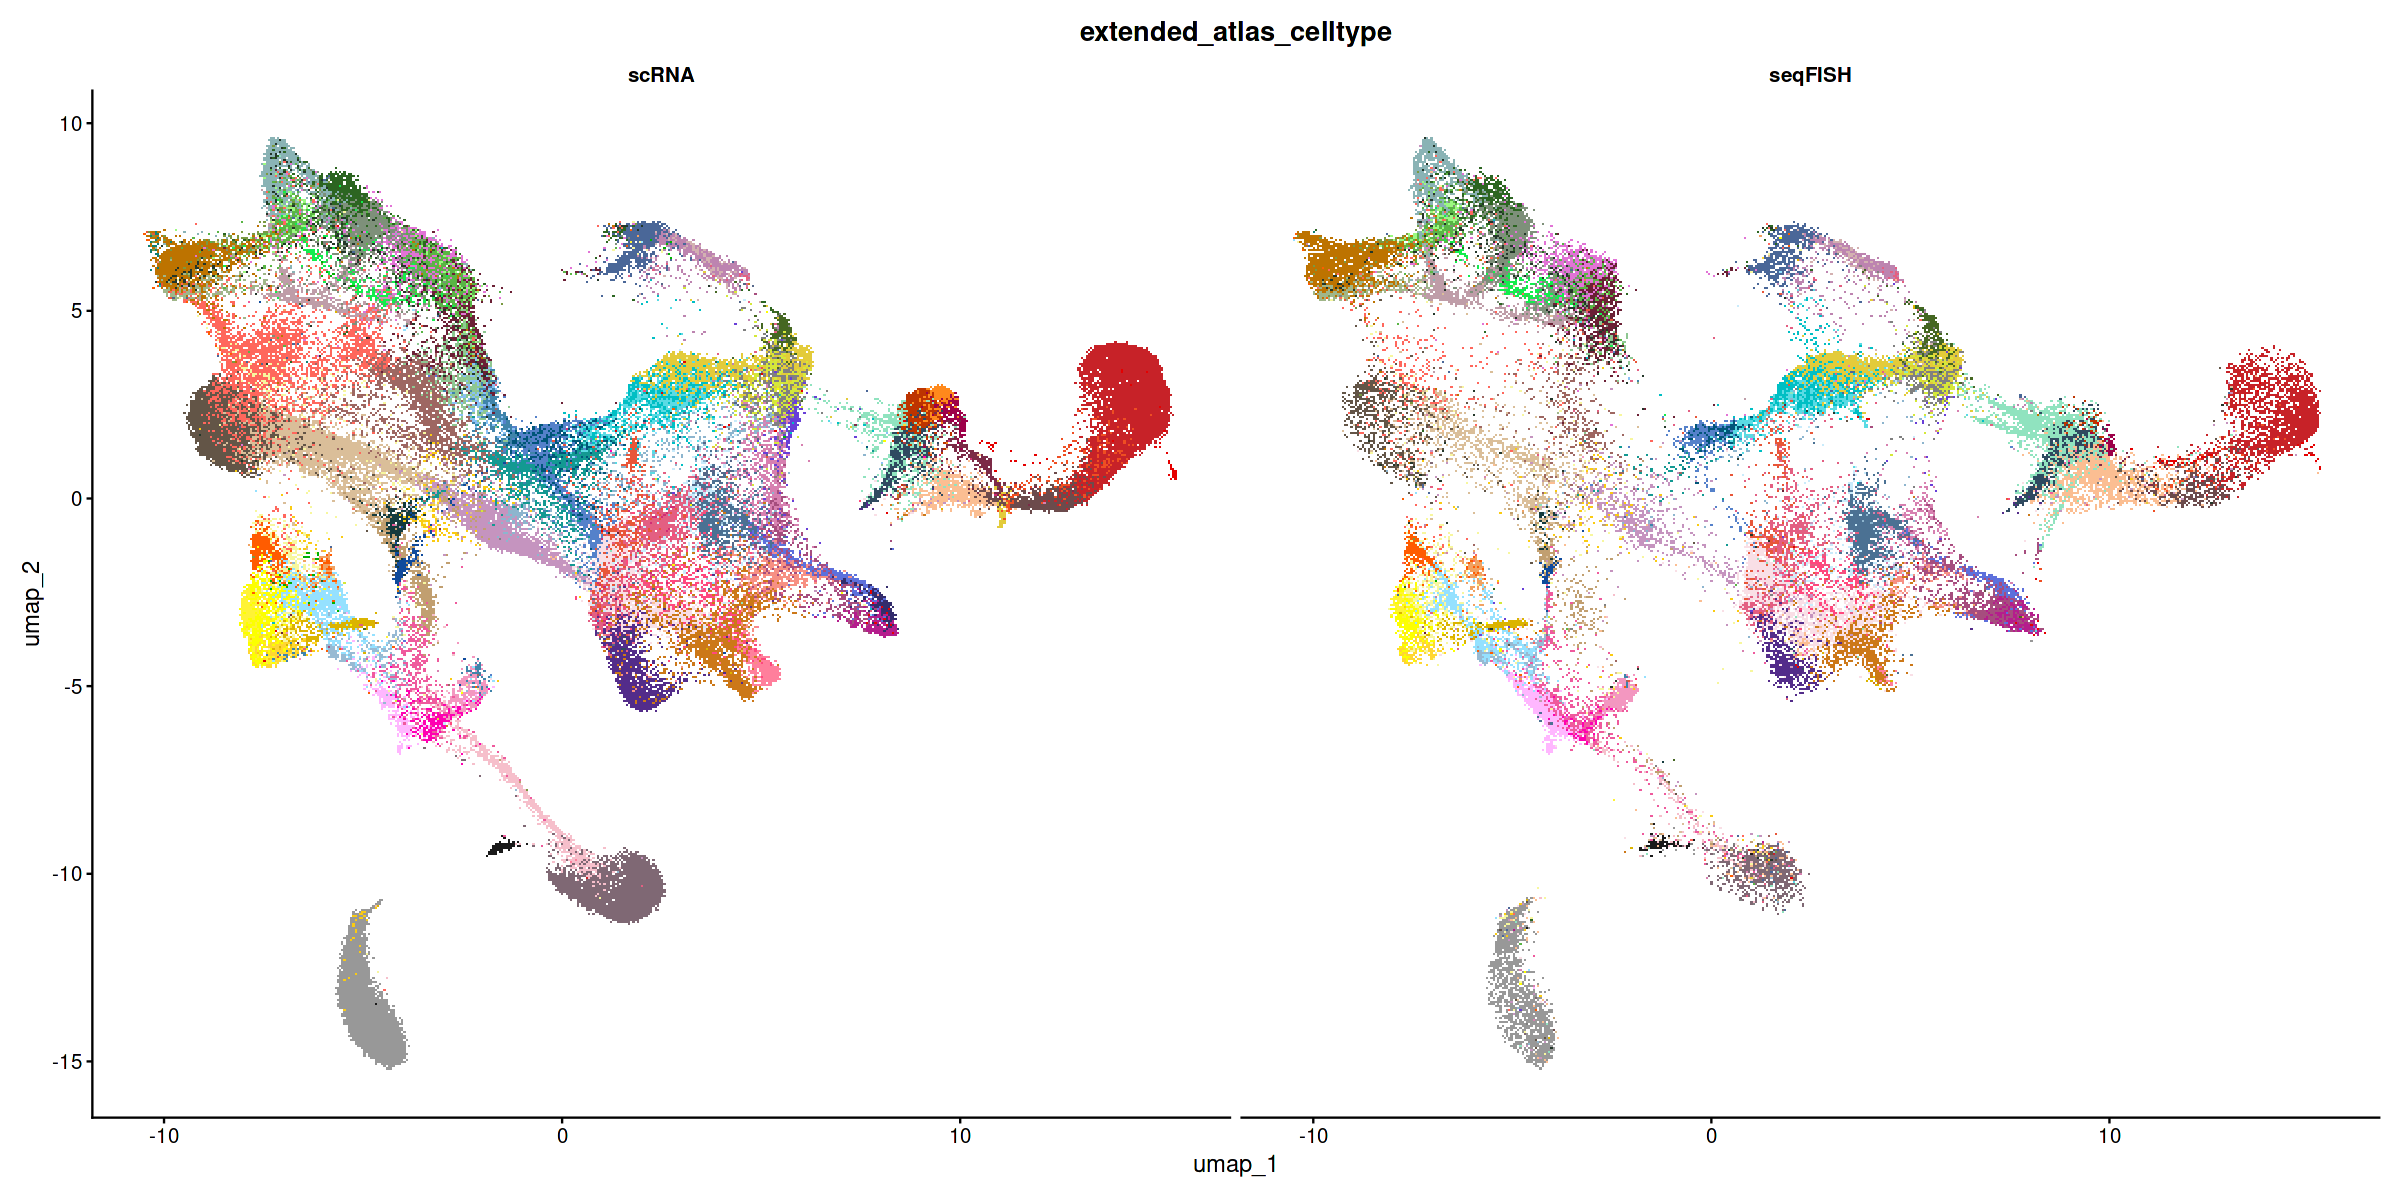

In [94]:
options(repr.plot.width=20, repr.plot.height=10)
DimPlot(seurat_subset, split.by = "dataset", group.by = "extended_atlas_celltype") +
  scale_color_manual(values = celltype.colors.extended) + 
  theme(legend.position = "none")

## Perform CLustering and SubClustering

In [150]:
seurat_subset <- seurat[,seurat@meta.data$cell_ID %in% post_QC_cells]

In [151]:
seurat_subset

An object of class Seurat 
55688 features across 188747 samples within 3 assays 
Active assay: RNA (27669 features, 0 variable features)
 2 other assays present: imputedlogcounts, seqFISHlogcounts

In [152]:
str(UMAP_coordinates)

Formal class 'DimReduc' [package "SeuratObject"] with 9 slots
  ..@ cell.embeddings           : num [1:188747, 1:2] -9.25 -5.67 -4.73 -8.78 -8.68 ...
  .. ..- attr(*, "scaled:center")= num [1:2] -0.0797 -0.1291
  .. ..- attr(*, "dimnames")=List of 2
  .. .. ..$ : chr [1:188747] "cell_1" "cell_2" "cell_5" "cell_6" ...
  .. .. ..$ : chr [1:2] "UMAP_1" "UMAP_2"
  ..@ feature.loadings          : num[0 , 0 ] 
  ..@ feature.loadings.projected: num[0 , 0 ] 
  ..@ assay.used                : chr "originalexp"
  ..@ global                    : logi TRUE
  ..@ stdev                     : num(0) 
  ..@ key                       : chr "UMAP_"
  ..@ jackstraw                 :Formal class 'JackStrawData' [package "SeuratObject"] with 4 slots
  .. .. ..@ empirical.p.values     : num[0 , 0 ] 
  .. .. ..@ fake.reduction.scores  : num[0 , 0 ] 
  .. .. ..@ empirical.p.values.full: num[0 , 0 ] 
  .. .. ..@ overall.p.values       : num[0 , 0 ] 
  ..@ misc                      : list()


In [153]:
##Create dimension reduced objects to insert into the seuart object
StabMAP_UMAP<- CreateDimReducObject(embeddings = umap_post_QC, 
                                         key = "umap",
                                         assay = "RNA")

Warning message:
“Keys should be one or more alphanumeric characters followed by an underscore, setting key from umap to umap_”
Warning message:
“All keys should be one or more alphanumeric characters followed by an underscore '_', setting key to umap_”


In [154]:
## Add the Stabmap coordinates and the UMAP coordinates to the 
seurat_subset[["StabMAP_UMAP"]] <- StabMAP_UMAP

In [155]:
## Add the Stabmap coordinates and the UMAP coordinates to the 
seurat_subset[["StabMAP_MNN"]] <- StabMAP_original

In [156]:
seurat_subset

An object of class Seurat 
55688 features across 188747 samples within 3 assays 
Active assay: RNA (27669 features, 0 variable features)
 2 other assays present: imputedlogcounts, seqFISHlogcounts
 2 dimensional reductions calculated: StabMAP_UMAP, StabMAP_MNN

In [157]:
# Define the dimensions and cluster resolution to use for the first round of clustering
dims_to_use <- 1:60  # Adjust as needed
cluster_resolution <- 3  # Adjust as needed

# Perform the first round of clustering
# Find Neighbors
seurat_subset <- FindNeighbors(seurat_subset, 
                               reduction = "StabMAP_MNN",
                               graph.name = c("StabMAP_NN", "StabMAP_SNN"),
                               dims = dims_to_use,
                               k.param = 5) 

# Find Clusters
seurat_subset <- FindClusters(seurat_subset, resolution = cluster_resolution,
                              graph.name = "StabMAP_SNN")

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 188747
Number of edges: 9360097

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8721
Number of communities: 75
Elapsed time: 67 seconds


10 singletons identified. 65 final clusters.



In [158]:
seurat_subcluster <- seurat_subset

In [159]:
# Initialize a list to store subcluster IDs
subcluster_ids <- list()

# Get the unique clusters from the initial clustering
initial_clusters <- unique(Idents(seurat_subcluster))

In [160]:
initial_clusters

[1] 0  2  6  45 37 7  13 27 38 61 22 43 63 44 29 19 17 25 12 26 10 24 47 36 57
[26] 14 31 56 35 20 51 39 48 40 15 11 3  16 53 58 30 46 23 41 4  49 62 50 54 28
[51] 5  8  32 42 60 52 21 34 1  59 18 33 64 9  55
65 Levels: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 ... 64

In [161]:
seurat_subcluster

An object of class Seurat 
55688 features across 188747 samples within 3 assays 
Active assay: RNA (27669 features, 0 variable features)
 2 other assays present: imputedlogcounts, seqFISHlogcounts
 2 dimensional reductions calculated: StabMAP_UMAP, StabMAP_MNN

In [162]:
# Define the dimensions and cluster resolution to use for the second round of subclustering
subcluster_dims_to_use <- 1:60  # Adjust as needed
subcluster_resolution <- 2  # Adjust as needed

# Get the unique clusters from the initial clustering
initial_clusters <- unique(Idents(seurat_subcluster))

# Function to perform subclustering on a given cluster
subcluster_function <- function(cluster) {
  # Identify the cells in the current cluster
  clusters_of_interest <- WhichCells(seurat_subcluster, idents = cluster)
  
  # Subset the Seurat object to include only the cells in the current cluster
  cluster_subset <- subset(seurat_subcluster, cells = clusters_of_interest)
  
  # Perform the second round of subclustering
  # Find Neighbors
  cluster_subset <- FindNeighbors(cluster_subset, 
                                  reduction = "StabMAP_MNN",
                                  graph.name = c("StabMAP_NN", "StabMAP_SNN"),
                                  dims = subcluster_dims_to_use)
  
  # Find Clusters
  cluster_subset <- FindClusters(cluster_subset, resolution = subcluster_resolution,
                                 graph.name = "StabMAP_SNN")
  return(cluster_subset)
}

# Apply the subclustering function to each initial cluster
subcluster_ids_list <- lapply(initial_clusters, subcluster_function)

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 9574
Number of edges: 296113

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.5084
Number of communities: 21
Elapsed time: 1 seconds


Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 6692
Number of edges: 256513

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.5689
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 6380
Number of edges: 244551

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.5596
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1655
Number of edges: 68267

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.5774
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 2434
Number of edges: 120507

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.5237
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 4572
Number of edges: 178137

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.5237
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3863
Number of edges: 188340

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.5631
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 2798
Number of edges: 122073

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.5164
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 2171
Number of edges: 95365

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.6167
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 944
Number of edges: 46698

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.4937
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3320
Number of edges: 169341

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.5557
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1843
Number of edges: 93254

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.5049
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 803
Number of edges: 33289

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.5554
Number of communities: 9
Elapsed time: 0 seconds


Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1785
Number of edges: 106295

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.4518
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 2672
Number of edges: 127654

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.5143
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3598
Number of edges: 172721

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.5743
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3728
Number of edges: 169872

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.5775
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3041
Number of edges: 152401

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.5868
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3953
Number of edges: 186181

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.5108
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 2831
Number of edges: 130487

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.5714
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 4028
Number of edges: 175760

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.5890
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3073
Number of edges: 142354

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.5625
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1537
Number of edges: 83189

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.5430
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 2476
Number of edges: 124518

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.4498
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1086
Number of edges: 48536

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.4353
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3856
Number of edges: 180060

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.6010
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 2595
Number of edges: 120692

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.5530
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1091
Number of edges: 62865

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.4587
Number of communities: 9
Elapsed time: 0 seconds


Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 2479
Number of edges: 114872

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.6016
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3426
Number of edges: 163762

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.5439
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1352
Number of edges: 70579

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.5258
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 2042
Number of edges: 103714

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.5199
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1521
Number of edges: 78425

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.4629
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 2028
Number of edges: 92083

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.5214
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3793
Number of edges: 186720

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.5086
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3964
Number of edges: 180469

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.6017
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 6687
Number of edges: 276324

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.5723
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3792
Number of edges: 165970

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.5140
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1316
Number of edges: 74217

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.4294
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1039
Number of edges: 59743

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.3337
Number of communities: 12
Elapsed time: 0 seconds


1 singletons identified. 11 final clusters.

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 2652
Number of edges: 123987

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.5457
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1645
Number of edges: 102440

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.3436
Number of communities: 15
Elapsed time: 0 seconds


1 singletons identified. 14 final clusters.

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3269
Number of edges: 163414

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.5736
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1978
Number of edges: 106189

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.4840
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 6640
Number of edges: 264489

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.5370
Number of communities: 17
Elapsed time: 0 seconds


Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1514
Number of edges: 86990

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.4568
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 804
Number of edges: 47123

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.3375
Number of communities: 10
Elapsed time: 0 seconds


1 singletons identified. 9 final clusters.

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1378
Number of edges: 76247

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.4046
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1232
Number of edges: 61371

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.5052
Number of communities: 9
Elapsed time: 0 seconds


Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 2677
Number of edges: 131578

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.5500
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 6545
Number of edges: 270297

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.5419
Number of communities: 18
Elapsed time: 0 seconds


1 singletons identified. 17 final clusters.

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 4124
Number of edges: 184864

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.4961
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 2575
Number of edges: 142802

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.5054
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1927
Number of edges: 95984

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.4627
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 984
Number of edges: 41972

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.5376
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1335
Number of edges: 69784

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.4363
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3351
Number of edges: 142357

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.4855
Number of communities: 17
Elapsed time: 0 seconds


Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 2482
Number of edges: 117537

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.5071
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 7276
Number of edges: 288588

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.5568
Number of communities: 17
Elapsed time: 0 seconds


Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1033
Number of edges: 45929

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.5656
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3627
Number of edges: 165879

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.5325
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 2573
Number of edges: 144952

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.4574
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 119
Number of edges: 3053

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.2138
Number of communities: 7
Elapsed time: 0 seconds


1 singletons identified. 6 final clusters.

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 4035
Number of edges: 163633

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.5287
Number of communities: 17
Elapsed time: 0 seconds


Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1134
Number of edges: 61626

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.4679
Number of communities: 11
Elapsed time: 0 seconds


In [163]:
subcluster_ids_list

[[1]]
An object of class Seurat 
55688 features across 9574 samples within 3 assays 
Active assay: RNA (27669 features, 0 variable features)
 2 other assays present: imputedlogcounts, seqFISHlogcounts
 2 dimensional reductions calculated: StabMAP_UMAP, StabMAP_MNN

[[2]]
An object of class Seurat 
55688 features across 6692 samples within 3 assays 
Active assay: RNA (27669 features, 0 variable features)
 2 other assays present: imputedlogcounts, seqFISHlogcounts
 2 dimensional reductions calculated: StabMAP_UMAP, StabMAP_MNN

[[3]]
An object of class Seurat 
55688 features across 6380 samples within 3 assays 
Active assay: RNA (27669 features, 0 variable features)
 2 other assays present: imputedlogcounts, seqFISHlogcounts
 2 dimensional reductions calculated: StabMAP_UMAP, StabMAP_MNN

[[4]]
An object of class Seurat 
55688 features across 1655 samples within 3 assays 
Active assay: RNA (27669 features, 0 variable features)
 2 other assays present: imputedlogcounts, seqFISHlogcounts
 

In [182]:
# Extract metadata from each Seurat object
metadata_list <- lapply(subcluster_ids_list, function(seurat_obj) {
  seurat_obj@meta.data
})

# Combine all metadata data.frames into a single data.frame
combined_metadata <- do.call(rbind, metadata_list)

# View the combined metadata
head(combined_metadata)

,orig.ident,nCount_RNA,nFeature_RNA,seqFISH_celltype,extended_atlas_celltype,AP,DV,dataset,cell_ID,StabMAP_SNN_res.3,seurat_clusters,StabMAP_SNN_res.2
,<fct>,<dbl>,<int>,<fct>,<chr>,<dbl>,<dbl>,<fct>,<chr>,<fct>,<fct>,<fct>
cell_1,cell,8962,2546,epiblast,Epiblast,NA,NA,scRNA,cell_1,0,10,10
cell_6,cell,20345,3864,epiblast,Epiblast,69.74577,69.83081,scRNA,cell_6,0,17,17
cell_8,cell,22542,4040,epiblast,Epiblast,71.04784,62.39884,scRNA,cell_8,0,6,6
cell_9,cell,24502,4350,epiblast,Epiblast,77.50144,78.04394,scRNA,cell_9,0,7,7
cell_10,cell,5640,1930,epiblast,Epiblast,73.56492,75.40462,scRNA,cell_10,0,8,8
cell_11,cell,20830,4025,epiblast,Epiblast,74.16856,58.93064,scRNA,cell_11,0,6,6


In [183]:
dim(combined_metadata)

[1] 188747     12

In [184]:
# extract the new subcluster information 
subcluster_metadata <- subset(combined_metadata, select = c(StabMAP_SNN_res.3, seurat_clusters))
colnames(subcluster_metadata) <- c("cluster", "subcluster")

subcluster_metadata$cluster_subcluster <- paste0(subcluster_metadata$cluster, ".", subcluster_metadata$subcluster)

In [278]:
head(subcluster_metadata)

,cluster,subcluster,cluster_subcluster
,<fct>,<fct>,<chr>
cell_1,0,10,0.10
cell_6,0,17,0.17
cell_8,0,6,0.6
cell_9,0,7,0.7
cell_10,0,8,0.8
cell_11,0,6,0.6


In [279]:
saveRDS(subcluster_metadata, "projects/03_seqFISH_FINAL/code/FINAL_METADATA/outputs/subcluster_metadata.Rds")

In [280]:
# add the subcluster now to the 
seurat_subset <- AddMetaData(seurat_subset, metadata = subcluster_metadata)

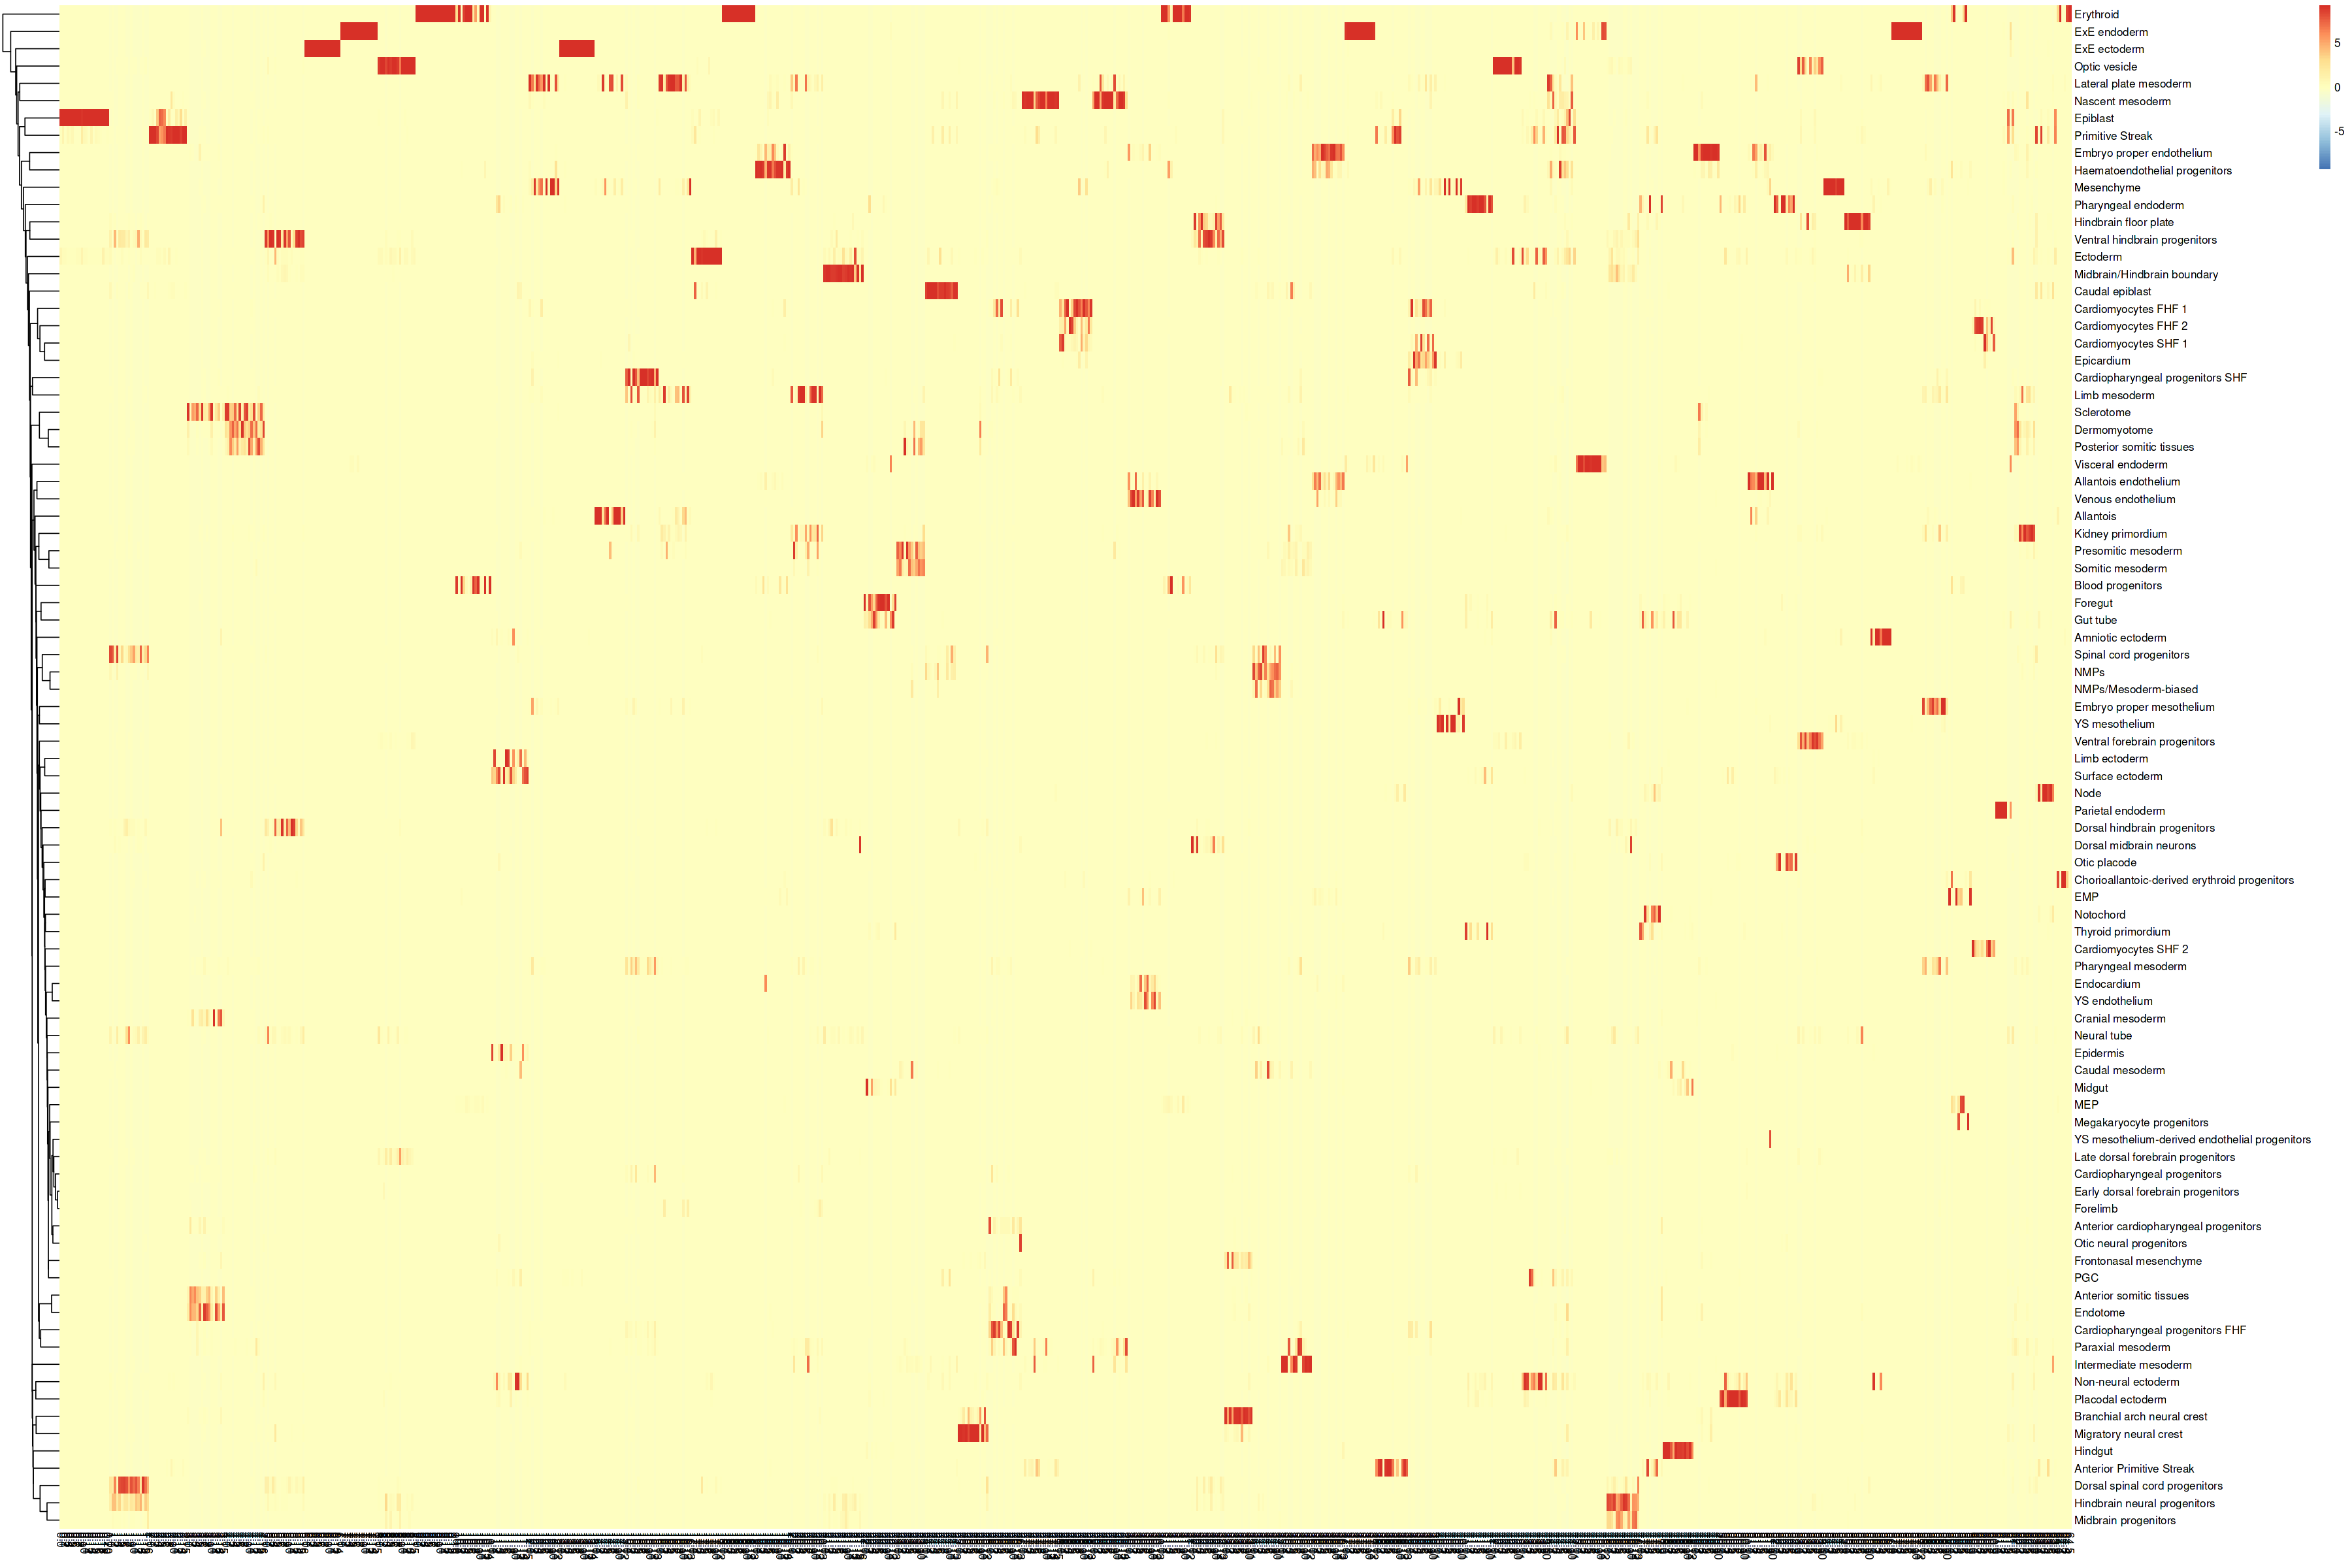

In [299]:
options(repr.plot.width=30, repr.plot.height=15)
df <- seurat_subset@meta.data

# Custom sorting function
sort_cluster_subcluster <- function(x) {
  parts <- strsplit(x, "\\.")
  parts <- lapply(parts, as.numeric)
  ordered <- order(sapply(parts, `[`, 1), sapply(parts, `[`, 2))
  x[ordered]
}

# Apply the sorting function to order the cluster_subcluster column
df <- df %>%
  mutate(cluster_subcluster = factor(cluster_subcluster, levels = sort_cluster_subcluster(unique(cluster_subcluster))))

options(repr.plot.width=30, repr.plot.height=20)
pheatmap(table(df$extended_atlas_celltype, df$cluster_subcluster), scale = "column",
        cluster_rows = TRUE,
        cluster_cols = FALSE)